### Problem Statement: Age Detection of Actors
https://datahack.analyticsvidhya.com/contest/practice-problem-age-detection/#ProblemStatement

### Libraries:

In [2]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plot
from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [7]:
#---- Reading file

In [10]:
train_csv = pd.read_csv("train.csv")
train_csv["Class"].unique()

array(['MIDDLE', 'YOUNG', 'OLD'], dtype=object)

In [4]:
train_csv.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [12]:
import os

In [23]:
parent_dir = "D:\Datascience\Analytic Vidya Hackathon\Age Detection\TRAINDS"
for i in train_csv["Class"].unique():    
    path = os.path.join(parent_dir,i)
    os.mkdir(path)
    print("Directory '%s' created" %i)
    

Directory 'MIDDLE' created
Directory 'YOUNG' created
Directory 'OLD' created


In [5]:
import shutil, sys   

In [24]:
#--- Separating images in 3 classes
for index, row in train_csv.iterrows():
    shutil.copy2("Train/"+row["ID"],"TRAINDS/"+row["Class"]+'/'+row["ID"])
    print("Train/"+row["ID"])
    print("TRAINDS/"+row["Class"]+'/'+row["ID"])
    

Train/377.jpg
TRAINDS/MIDDLE/377.jpg
Train/17814.jpg
TRAINDS/YOUNG/17814.jpg
Train/21283.jpg
TRAINDS/MIDDLE/21283.jpg
Train/16496.jpg
TRAINDS/YOUNG/16496.jpg
Train/4487.jpg
TRAINDS/MIDDLE/4487.jpg
Train/6283.jpg
TRAINDS/MIDDLE/6283.jpg
Train/23495.jpg
TRAINDS/YOUNG/23495.jpg
Train/7100.jpg
TRAINDS/YOUNG/7100.jpg
Train/6028.jpg
TRAINDS/YOUNG/6028.jpg
Train/22617.jpg
TRAINDS/OLD/22617.jpg
Train/11177.jpg
TRAINDS/YOUNG/11177.jpg
Train/2462.jpg
TRAINDS/MIDDLE/2462.jpg
Train/24116.jpg
TRAINDS/MIDDLE/24116.jpg
Train/17689.jpg
TRAINDS/MIDDLE/17689.jpg
Train/728.jpg
TRAINDS/MIDDLE/728.jpg
Train/3003.jpg
TRAINDS/MIDDLE/3003.jpg
Train/14408.jpg
TRAINDS/OLD/14408.jpg
Train/6679.jpg
TRAINDS/YOUNG/6679.jpg
Train/15152.jpg
TRAINDS/OLD/15152.jpg
Train/24784.jpg
TRAINDS/MIDDLE/24784.jpg
Train/9970.jpg
TRAINDS/YOUNG/9970.jpg
Train/22550.jpg
TRAINDS/OLD/22550.jpg
Train/150.jpg
TRAINDS/YOUNG/150.jpg
Train/7379.jpg
TRAINDS/MIDDLE/7379.jpg
Train/15387.jpg
TRAINDS/MIDDLE/15387.jpg
Train/2336.jpg
TRAINDS/YOU

Train/1864.jpg
TRAINDS/YOUNG/1864.jpg
Train/2662.jpg
TRAINDS/MIDDLE/2662.jpg
Train/15129.jpg
TRAINDS/MIDDLE/15129.jpg
Train/18602.jpg
TRAINDS/MIDDLE/18602.jpg
Train/26315.jpg
TRAINDS/MIDDLE/26315.jpg
Train/12725.jpg
TRAINDS/YOUNG/12725.jpg
Train/25960.jpg
TRAINDS/MIDDLE/25960.jpg
Train/14673.jpg
TRAINDS/MIDDLE/14673.jpg
Train/12282.jpg
TRAINDS/OLD/12282.jpg
Train/17861.jpg
TRAINDS/MIDDLE/17861.jpg
Train/15847.jpg
TRAINDS/MIDDLE/15847.jpg
Train/2574.jpg
TRAINDS/YOUNG/2574.jpg
Train/9657.jpg
TRAINDS/MIDDLE/9657.jpg
Train/19785.jpg
TRAINDS/MIDDLE/19785.jpg
Train/2678.jpg
TRAINDS/YOUNG/2678.jpg
Train/22923.jpg
TRAINDS/YOUNG/22923.jpg
Train/1141.jpg
TRAINDS/MIDDLE/1141.jpg
Train/25604.jpg
TRAINDS/OLD/25604.jpg
Train/13766.jpg
TRAINDS/MIDDLE/13766.jpg
Train/21429.jpg
TRAINDS/MIDDLE/21429.jpg
Train/12024.jpg
TRAINDS/MIDDLE/12024.jpg
Train/7402.jpg
TRAINDS/YOUNG/7402.jpg
Train/20975.jpg
TRAINDS/YOUNG/20975.jpg
Train/9331.jpg
TRAINDS/OLD/9331.jpg
Train/462.jpg
TRAINDS/YOUNG/462.jpg
Train/8203.j

Train/20350.jpg
TRAINDS/YOUNG/20350.jpg
Train/16154.jpg
TRAINDS/OLD/16154.jpg
Train/5911.jpg
TRAINDS/MIDDLE/5911.jpg
Train/13226.jpg
TRAINDS/YOUNG/13226.jpg
Train/22381.jpg
TRAINDS/MIDDLE/22381.jpg
Train/6841.jpg
TRAINDS/MIDDLE/6841.jpg
Train/20867.jpg
TRAINDS/YOUNG/20867.jpg
Train/601.jpg
TRAINDS/YOUNG/601.jpg
Train/16406.jpg
TRAINDS/MIDDLE/16406.jpg
Train/20811.jpg
TRAINDS/YOUNG/20811.jpg
Train/4823.jpg
TRAINDS/MIDDLE/4823.jpg
Train/12033.jpg
TRAINDS/YOUNG/12033.jpg
Train/5859.jpg
TRAINDS/YOUNG/5859.jpg
Train/17169.jpg
TRAINDS/MIDDLE/17169.jpg
Train/6691.jpg
TRAINDS/OLD/6691.jpg
Train/537.jpg
TRAINDS/MIDDLE/537.jpg
Train/26003.jpg
TRAINDS/MIDDLE/26003.jpg
Train/5069.jpg
TRAINDS/MIDDLE/5069.jpg
Train/1330.jpg
TRAINDS/MIDDLE/1330.jpg
Train/23418.jpg
TRAINDS/MIDDLE/23418.jpg
Train/361.jpg
TRAINDS/OLD/361.jpg
Train/18517.jpg
TRAINDS/MIDDLE/18517.jpg
Train/17498.jpg
TRAINDS/YOUNG/17498.jpg
Train/14856.jpg
TRAINDS/MIDDLE/14856.jpg
Train/22929.jpg
TRAINDS/MIDDLE/22929.jpg
Train/12187.jpg
TR

Train/22151.jpg
TRAINDS/OLD/22151.jpg
Train/11900.jpg
TRAINDS/MIDDLE/11900.jpg
Train/20430.jpg
TRAINDS/YOUNG/20430.jpg
Train/10619.jpg
TRAINDS/MIDDLE/10619.jpg
Train/4193.jpg
TRAINDS/MIDDLE/4193.jpg
Train/18394.jpg
TRAINDS/YOUNG/18394.jpg
Train/10741.jpg
TRAINDS/MIDDLE/10741.jpg
Train/5921.jpg
TRAINDS/MIDDLE/5921.jpg
Train/22139.jpg
TRAINDS/MIDDLE/22139.jpg
Train/7404.jpg
TRAINDS/MIDDLE/7404.jpg
Train/3719.jpg
TRAINDS/MIDDLE/3719.jpg
Train/20708.jpg
TRAINDS/YOUNG/20708.jpg
Train/2822.jpg
TRAINDS/OLD/2822.jpg
Train/25977.jpg
TRAINDS/MIDDLE/25977.jpg
Train/241.jpg
TRAINDS/MIDDLE/241.jpg
Train/26517.jpg
TRAINDS/YOUNG/26517.jpg
Train/15626.jpg
TRAINDS/MIDDLE/15626.jpg
Train/3145.jpg
TRAINDS/MIDDLE/3145.jpg
Train/24087.jpg
TRAINDS/YOUNG/24087.jpg
Train/12080.jpg
TRAINDS/MIDDLE/12080.jpg
Train/2652.jpg
TRAINDS/YOUNG/2652.jpg
Train/8955.jpg
TRAINDS/OLD/8955.jpg
Train/1906.jpg
TRAINDS/MIDDLE/1906.jpg
Train/6139.jpg
TRAINDS/OLD/6139.jpg
Train/2059.jpg
TRAINDS/YOUNG/2059.jpg
Train/11381.jpg
TRAI

Train/21017.jpg
TRAINDS/MIDDLE/21017.jpg
Train/11115.jpg
TRAINDS/OLD/11115.jpg
Train/9013.jpg
TRAINDS/YOUNG/9013.jpg
Train/2188.jpg
TRAINDS/MIDDLE/2188.jpg
Train/7667.jpg
TRAINDS/YOUNG/7667.jpg
Train/22641.jpg
TRAINDS/MIDDLE/22641.jpg
Train/24351.jpg
TRAINDS/YOUNG/24351.jpg
Train/15894.jpg
TRAINDS/YOUNG/15894.jpg
Train/3487.jpg
TRAINDS/OLD/3487.jpg
Train/14717.jpg
TRAINDS/YOUNG/14717.jpg
Train/3059.jpg
TRAINDS/YOUNG/3059.jpg
Train/14903.jpg
TRAINDS/MIDDLE/14903.jpg
Train/8001.jpg
TRAINDS/YOUNG/8001.jpg
Train/16801.jpg
TRAINDS/YOUNG/16801.jpg
Train/2862.jpg
TRAINDS/YOUNG/2862.jpg
Train/14168.jpg
TRAINDS/MIDDLE/14168.jpg
Train/17629.jpg
TRAINDS/YOUNG/17629.jpg
Train/14155.jpg
TRAINDS/MIDDLE/14155.jpg
Train/21768.jpg
TRAINDS/MIDDLE/21768.jpg
Train/17420.jpg
TRAINDS/YOUNG/17420.jpg
Train/7361.jpg
TRAINDS/YOUNG/7361.jpg
Train/16654.jpg
TRAINDS/YOUNG/16654.jpg
Train/24939.jpg
TRAINDS/MIDDLE/24939.jpg
Train/23613.jpg
TRAINDS/OLD/23613.jpg
Train/2039.jpg
TRAINDS/YOUNG/2039.jpg
Train/781.jpg
TR

Train/7173.jpg
TRAINDS/MIDDLE/7173.jpg
Train/10829.jpg
TRAINDS/OLD/10829.jpg
Train/4535.jpg
TRAINDS/MIDDLE/4535.jpg
Train/13261.jpg
TRAINDS/MIDDLE/13261.jpg
Train/1064.jpg
TRAINDS/MIDDLE/1064.jpg
Train/19263.jpg
TRAINDS/MIDDLE/19263.jpg
Train/9836.jpg
TRAINDS/MIDDLE/9836.jpg
Train/14322.jpg
TRAINDS/YOUNG/14322.jpg
Train/5745.jpg
TRAINDS/MIDDLE/5745.jpg
Train/7642.jpg
TRAINDS/MIDDLE/7642.jpg
Train/4934.jpg
TRAINDS/MIDDLE/4934.jpg
Train/13015.jpg
TRAINDS/MIDDLE/13015.jpg
Train/19076.jpg
TRAINDS/MIDDLE/19076.jpg
Train/12628.jpg
TRAINDS/MIDDLE/12628.jpg
Train/23490.jpg
TRAINDS/YOUNG/23490.jpg
Train/18434.jpg
TRAINDS/MIDDLE/18434.jpg
Train/25670.jpg
TRAINDS/YOUNG/25670.jpg
Train/21462.jpg
TRAINDS/MIDDLE/21462.jpg
Train/11578.jpg
TRAINDS/MIDDLE/11578.jpg
Train/9798.jpg
TRAINDS/YOUNG/9798.jpg
Train/24648.jpg
TRAINDS/MIDDLE/24648.jpg
Train/4793.jpg
TRAINDS/MIDDLE/4793.jpg
Train/12749.jpg
TRAINDS/MIDDLE/12749.jpg
Train/6071.jpg
TRAINDS/MIDDLE/6071.jpg
Train/8635.jpg
TRAINDS/YOUNG/8635.jpg
Train

Train/4787.jpg
TRAINDS/MIDDLE/4787.jpg
Train/15893.jpg
TRAINDS/MIDDLE/15893.jpg
Train/18409.jpg
TRAINDS/YOUNG/18409.jpg
Train/14024.jpg
TRAINDS/YOUNG/14024.jpg
Train/12483.jpg
TRAINDS/YOUNG/12483.jpg
Train/2460.jpg
TRAINDS/MIDDLE/2460.jpg
Train/8439.jpg
TRAINDS/YOUNG/8439.jpg
Train/7092.jpg
TRAINDS/MIDDLE/7092.jpg
Train/10816.jpg
TRAINDS/MIDDLE/10816.jpg
Train/12803.jpg
TRAINDS/YOUNG/12803.jpg
Train/22192.jpg
TRAINDS/MIDDLE/22192.jpg
Train/9160.jpg
TRAINDS/MIDDLE/9160.jpg
Train/5364.jpg
TRAINDS/MIDDLE/5364.jpg
Train/7055.jpg
TRAINDS/MIDDLE/7055.jpg
Train/2972.jpg
TRAINDS/MIDDLE/2972.jpg
Train/1587.jpg
TRAINDS/YOUNG/1587.jpg
Train/1938.jpg
TRAINDS/YOUNG/1938.jpg
Train/847.jpg
TRAINDS/MIDDLE/847.jpg
Train/11656.jpg
TRAINDS/YOUNG/11656.jpg
Train/8135.jpg
TRAINDS/MIDDLE/8135.jpg
Train/1258.jpg
TRAINDS/YOUNG/1258.jpg
Train/24674.jpg
TRAINDS/MIDDLE/24674.jpg
Train/7111.jpg
TRAINDS/YOUNG/7111.jpg
Train/4229.jpg
TRAINDS/YOUNG/4229.jpg
Train/19002.jpg
TRAINDS/YOUNG/19002.jpg
Train/4832.jpg
TRAI

Train/19490.jpg
TRAINDS/YOUNG/19490.jpg
Train/7907.jpg
TRAINDS/YOUNG/7907.jpg
Train/24585.jpg
TRAINDS/MIDDLE/24585.jpg
Train/3351.jpg
TRAINDS/YOUNG/3351.jpg
Train/14929.jpg
TRAINDS/YOUNG/14929.jpg
Train/733.jpg
TRAINDS/MIDDLE/733.jpg
Train/14525.jpg
TRAINDS/YOUNG/14525.jpg
Train/2627.jpg
TRAINDS/YOUNG/2627.jpg
Train/10552.jpg
TRAINDS/YOUNG/10552.jpg
Train/1117.jpg
TRAINDS/MIDDLE/1117.jpg
Train/24177.jpg
TRAINDS/YOUNG/24177.jpg
Train/12957.jpg
TRAINDS/YOUNG/12957.jpg
Train/12648.jpg
TRAINDS/MIDDLE/12648.jpg
Train/4541.jpg
TRAINDS/YOUNG/4541.jpg
Train/8233.jpg
TRAINDS/OLD/8233.jpg
Train/5732.jpg
TRAINDS/YOUNG/5732.jpg
Train/24675.jpg
TRAINDS/MIDDLE/24675.jpg
Train/10991.jpg
TRAINDS/YOUNG/10991.jpg
Train/673.jpg
TRAINDS/YOUNG/673.jpg
Train/13324.jpg
TRAINDS/YOUNG/13324.jpg
Train/11513.jpg
TRAINDS/MIDDLE/11513.jpg
Train/26249.jpg
TRAINDS/OLD/26249.jpg
Train/162.jpg
TRAINDS/MIDDLE/162.jpg
Train/21364.jpg
TRAINDS/YOUNG/21364.jpg
Train/17650.jpg
TRAINDS/MIDDLE/17650.jpg
Train/23076.jpg
TRAIND

Train/19707.jpg
TRAINDS/MIDDLE/19707.jpg
Train/1151.jpg
TRAINDS/YOUNG/1151.jpg
Train/15247.jpg
TRAINDS/YOUNG/15247.jpg
Train/19373.jpg
TRAINDS/YOUNG/19373.jpg
Train/1867.jpg
TRAINDS/MIDDLE/1867.jpg
Train/21583.jpg
TRAINDS/MIDDLE/21583.jpg
Train/16726.jpg
TRAINDS/MIDDLE/16726.jpg
Train/17496.jpg
TRAINDS/YOUNG/17496.jpg
Train/7723.jpg
TRAINDS/MIDDLE/7723.jpg
Train/15617.jpg
TRAINDS/YOUNG/15617.jpg
Train/20232.jpg
TRAINDS/MIDDLE/20232.jpg
Train/19257.jpg
TRAINDS/MIDDLE/19257.jpg
Train/13020.jpg
TRAINDS/MIDDLE/13020.jpg
Train/22191.jpg
TRAINDS/MIDDLE/22191.jpg
Train/14343.jpg
TRAINDS/MIDDLE/14343.jpg
Train/2819.jpg
TRAINDS/MIDDLE/2819.jpg
Train/6720.jpg
TRAINDS/MIDDLE/6720.jpg
Train/25118.jpg
TRAINDS/OLD/25118.jpg
Train/83.jpg
TRAINDS/MIDDLE/83.jpg
Train/20803.jpg
TRAINDS/MIDDLE/20803.jpg
Train/8636.jpg
TRAINDS/YOUNG/8636.jpg
Train/21924.jpg
TRAINDS/MIDDLE/21924.jpg
Train/23700.jpg
TRAINDS/OLD/23700.jpg
Train/19837.jpg
TRAINDS/MIDDLE/19837.jpg
Train/8357.jpg
TRAINDS/YOUNG/8357.jpg
Train/24

Train/17104.jpg
TRAINDS/MIDDLE/17104.jpg
Train/2530.jpg
TRAINDS/YOUNG/2530.jpg
Train/6431.jpg
TRAINDS/YOUNG/6431.jpg
Train/6774.jpg
TRAINDS/YOUNG/6774.jpg
Train/24352.jpg
TRAINDS/MIDDLE/24352.jpg
Train/9238.jpg
TRAINDS/MIDDLE/9238.jpg
Train/9062.jpg
TRAINDS/MIDDLE/9062.jpg
Train/10897.jpg
TRAINDS/YOUNG/10897.jpg
Train/15050.jpg
TRAINDS/MIDDLE/15050.jpg
Train/2259.jpg
TRAINDS/MIDDLE/2259.jpg
Train/5161.jpg
TRAINDS/MIDDLE/5161.jpg
Train/15068.jpg
TRAINDS/MIDDLE/15068.jpg
Train/5899.jpg
TRAINDS/MIDDLE/5899.jpg
Train/19142.jpg
TRAINDS/MIDDLE/19142.jpg
Train/17700.jpg
TRAINDS/MIDDLE/17700.jpg
Train/1555.jpg
TRAINDS/YOUNG/1555.jpg
Train/8658.jpg
TRAINDS/MIDDLE/8658.jpg
Train/5768.jpg
TRAINDS/MIDDLE/5768.jpg
Train/5954.jpg
TRAINDS/MIDDLE/5954.jpg
Train/24415.jpg
TRAINDS/YOUNG/24415.jpg
Train/23030.jpg
TRAINDS/MIDDLE/23030.jpg
Train/12445.jpg
TRAINDS/MIDDLE/12445.jpg
Train/10664.jpg
TRAINDS/MIDDLE/10664.jpg
Train/9673.jpg
TRAINDS/MIDDLE/9673.jpg
Train/16830.jpg
TRAINDS/MIDDLE/16830.jpg
Train/2

Train/14814.jpg
TRAINDS/OLD/14814.jpg
Train/24955.jpg
TRAINDS/MIDDLE/24955.jpg
Train/23414.jpg
TRAINDS/YOUNG/23414.jpg
Train/13643.jpg
TRAINDS/MIDDLE/13643.jpg
Train/24819.jpg
TRAINDS/MIDDLE/24819.jpg
Train/156.jpg
TRAINDS/YOUNG/156.jpg
Train/21862.jpg
TRAINDS/YOUNG/21862.jpg
Train/1486.jpg
TRAINDS/MIDDLE/1486.jpg
Train/21230.jpg
TRAINDS/YOUNG/21230.jpg
Train/15650.jpg
TRAINDS/YOUNG/15650.jpg
Train/4169.jpg
TRAINDS/MIDDLE/4169.jpg
Train/21296.jpg
TRAINDS/MIDDLE/21296.jpg
Train/21709.jpg
TRAINDS/MIDDLE/21709.jpg
Train/11024.jpg
TRAINDS/MIDDLE/11024.jpg
Train/11133.jpg
TRAINDS/YOUNG/11133.jpg
Train/16198.jpg
TRAINDS/OLD/16198.jpg
Train/3330.jpg
TRAINDS/MIDDLE/3330.jpg
Train/12730.jpg
TRAINDS/MIDDLE/12730.jpg
Train/11209.jpg
TRAINDS/YOUNG/11209.jpg
Train/4251.jpg
TRAINDS/YOUNG/4251.jpg
Train/20397.jpg
TRAINDS/YOUNG/20397.jpg
Train/14089.jpg
TRAINDS/MIDDLE/14089.jpg
Train/19394.jpg
TRAINDS/OLD/19394.jpg
Train/13821.jpg
TRAINDS/YOUNG/13821.jpg
Train/25849.jpg
TRAINDS/YOUNG/25849.jpg
Train/1

Train/18753.jpg
TRAINDS/MIDDLE/18753.jpg
Train/11981.jpg
TRAINDS/YOUNG/11981.jpg
Train/11175.jpg
TRAINDS/YOUNG/11175.jpg
Train/24935.jpg
TRAINDS/YOUNG/24935.jpg
Train/10079.jpg
TRAINDS/MIDDLE/10079.jpg
Train/1960.jpg
TRAINDS/YOUNG/1960.jpg
Train/18373.jpg
TRAINDS/MIDDLE/18373.jpg
Train/13644.jpg
TRAINDS/MIDDLE/13644.jpg
Train/3056.jpg
TRAINDS/MIDDLE/3056.jpg
Train/21937.jpg
TRAINDS/YOUNG/21937.jpg
Train/9234.jpg
TRAINDS/YOUNG/9234.jpg
Train/7804.jpg
TRAINDS/MIDDLE/7804.jpg
Train/26200.jpg
TRAINDS/YOUNG/26200.jpg
Train/21077.jpg
TRAINDS/MIDDLE/21077.jpg
Train/14338.jpg
TRAINDS/YOUNG/14338.jpg
Train/14556.jpg
TRAINDS/OLD/14556.jpg
Train/20214.jpg
TRAINDS/OLD/20214.jpg
Train/3399.jpg
TRAINDS/YOUNG/3399.jpg
Train/22193.jpg
TRAINDS/OLD/22193.jpg
Train/22126.jpg
TRAINDS/OLD/22126.jpg
Train/2809.jpg
TRAINDS/OLD/2809.jpg
Train/16960.jpg
TRAINDS/YOUNG/16960.jpg
Train/15287.jpg
TRAINDS/MIDDLE/15287.jpg
Train/8759.jpg
TRAINDS/YOUNG/8759.jpg
Train/3097.jpg
TRAINDS/MIDDLE/3097.jpg
Train/8862.jpg
TR

Train/12455.jpg
TRAINDS/MIDDLE/12455.jpg
Train/7405.jpg
TRAINDS/MIDDLE/7405.jpg
Train/25536.jpg
TRAINDS/MIDDLE/25536.jpg
Train/6317.jpg
TRAINDS/MIDDLE/6317.jpg
Train/5574.jpg
TRAINDS/MIDDLE/5574.jpg
Train/20697.jpg
TRAINDS/YOUNG/20697.jpg
Train/17562.jpg
TRAINDS/MIDDLE/17562.jpg
Train/3336.jpg
TRAINDS/YOUNG/3336.jpg
Train/3082.jpg
TRAINDS/MIDDLE/3082.jpg
Train/4463.jpg
TRAINDS/YOUNG/4463.jpg
Train/22337.jpg
TRAINDS/MIDDLE/22337.jpg
Train/25712.jpg
TRAINDS/MIDDLE/25712.jpg
Train/5259.jpg
TRAINDS/OLD/5259.jpg
Train/7820.jpg
TRAINDS/YOUNG/7820.jpg
Train/12526.jpg
TRAINDS/YOUNG/12526.jpg
Train/100.jpg
TRAINDS/MIDDLE/100.jpg
Train/16010.jpg
TRAINDS/MIDDLE/16010.jpg
Train/15623.jpg
TRAINDS/OLD/15623.jpg
Train/26008.jpg
TRAINDS/MIDDLE/26008.jpg
Train/6282.jpg
TRAINDS/YOUNG/6282.jpg
Train/10901.jpg
TRAINDS/MIDDLE/10901.jpg
Train/5058.jpg
TRAINDS/MIDDLE/5058.jpg
Train/17717.jpg
TRAINDS/YOUNG/17717.jpg
Train/5466.jpg
TRAINDS/MIDDLE/5466.jpg
Train/19844.jpg
TRAINDS/YOUNG/19844.jpg
Train/17889.jpg

Train/14042.jpg
TRAINDS/OLD/14042.jpg
Train/3106.jpg
TRAINDS/OLD/3106.jpg
Train/19505.jpg
TRAINDS/YOUNG/19505.jpg
Train/19476.jpg
TRAINDS/YOUNG/19476.jpg
Train/21226.jpg
TRAINDS/MIDDLE/21226.jpg
Train/23395.jpg
TRAINDS/YOUNG/23395.jpg
Train/11380.jpg
TRAINDS/MIDDLE/11380.jpg
Train/21716.jpg
TRAINDS/YOUNG/21716.jpg
Train/17849.jpg
TRAINDS/MIDDLE/17849.jpg
Train/24383.jpg
TRAINDS/MIDDLE/24383.jpg
Train/14146.jpg
TRAINDS/MIDDLE/14146.jpg
Train/22580.jpg
TRAINDS/YOUNG/22580.jpg
Train/129.jpg
TRAINDS/MIDDLE/129.jpg
Train/4363.jpg
TRAINDS/MIDDLE/4363.jpg
Train/1139.jpg
TRAINDS/MIDDLE/1139.jpg
Train/3224.jpg
TRAINDS/MIDDLE/3224.jpg
Train/3808.jpg
TRAINDS/MIDDLE/3808.jpg
Train/10929.jpg
TRAINDS/MIDDLE/10929.jpg
Train/14571.jpg
TRAINDS/MIDDLE/14571.jpg
Train/2905.jpg
TRAINDS/MIDDLE/2905.jpg
Train/3529.jpg
TRAINDS/OLD/3529.jpg
Train/13451.jpg
TRAINDS/OLD/13451.jpg
Train/8572.jpg
TRAINDS/YOUNG/8572.jpg
Train/15771.jpg
TRAINDS/YOUNG/15771.jpg
Train/20374.jpg
TRAINDS/YOUNG/20374.jpg
Train/25900.jpg

Train/5508.jpg
TRAINDS/MIDDLE/5508.jpg
Train/23055.jpg
TRAINDS/YOUNG/23055.jpg
Train/23056.jpg
TRAINDS/YOUNG/23056.jpg
Train/23262.jpg
TRAINDS/YOUNG/23262.jpg
Train/2477.jpg
TRAINDS/MIDDLE/2477.jpg
Train/9650.jpg
TRAINDS/YOUNG/9650.jpg
Train/17909.jpg
TRAINDS/MIDDLE/17909.jpg
Train/5369.jpg
TRAINDS/YOUNG/5369.jpg
Train/10809.jpg
TRAINDS/MIDDLE/10809.jpg
Train/21911.jpg
TRAINDS/MIDDLE/21911.jpg
Train/2647.jpg
TRAINDS/MIDDLE/2647.jpg
Train/6564.jpg
TRAINDS/MIDDLE/6564.jpg
Train/11064.jpg
TRAINDS/MIDDLE/11064.jpg
Train/5076.jpg
TRAINDS/YOUNG/5076.jpg
Train/3522.jpg
TRAINDS/OLD/3522.jpg
Train/13601.jpg
TRAINDS/MIDDLE/13601.jpg
Train/5553.jpg
TRAINDS/YOUNG/5553.jpg
Train/1748.jpg
TRAINDS/MIDDLE/1748.jpg
Train/279.jpg
TRAINDS/YOUNG/279.jpg
Train/5059.jpg
TRAINDS/YOUNG/5059.jpg
Train/16310.jpg
TRAINDS/MIDDLE/16310.jpg
Train/21566.jpg
TRAINDS/YOUNG/21566.jpg
Train/3644.jpg
TRAINDS/YOUNG/3644.jpg
Train/7513.jpg
TRAINDS/MIDDLE/7513.jpg
Train/24348.jpg
TRAINDS/OLD/24348.jpg
Train/20011.jpg
TRAIND

Train/9879.jpg
TRAINDS/OLD/9879.jpg
Train/11332.jpg
TRAINDS/MIDDLE/11332.jpg
Train/17765.jpg
TRAINDS/MIDDLE/17765.jpg
Train/4936.jpg
TRAINDS/OLD/4936.jpg
Train/3104.jpg
TRAINDS/MIDDLE/3104.jpg
Train/17173.jpg
TRAINDS/YOUNG/17173.jpg
Train/15283.jpg
TRAINDS/YOUNG/15283.jpg
Train/7998.jpg
TRAINDS/YOUNG/7998.jpg
Train/748.jpg
TRAINDS/MIDDLE/748.jpg
Train/12206.jpg
TRAINDS/YOUNG/12206.jpg
Train/1733.jpg
TRAINDS/MIDDLE/1733.jpg
Train/10494.jpg
TRAINDS/YOUNG/10494.jpg
Train/4107.jpg
TRAINDS/MIDDLE/4107.jpg
Train/13368.jpg
TRAINDS/MIDDLE/13368.jpg
Train/1397.jpg
TRAINDS/MIDDLE/1397.jpg
Train/14865.jpg
TRAINDS/MIDDLE/14865.jpg
Train/7980.jpg
TRAINDS/YOUNG/7980.jpg
Train/15573.jpg
TRAINDS/YOUNG/15573.jpg
Train/5243.jpg
TRAINDS/MIDDLE/5243.jpg
Train/11259.jpg
TRAINDS/MIDDLE/11259.jpg
Train/238.jpg
TRAINDS/MIDDLE/238.jpg
Train/9968.jpg
TRAINDS/OLD/9968.jpg
Train/25891.jpg
TRAINDS/MIDDLE/25891.jpg
Train/6097.jpg
TRAINDS/YOUNG/6097.jpg
Train/18874.jpg
TRAINDS/MIDDLE/18874.jpg
Train/6646.jpg
TRAINDS

Train/17988.jpg
TRAINDS/YOUNG/17988.jpg
Train/5211.jpg
TRAINDS/MIDDLE/5211.jpg
Train/10166.jpg
TRAINDS/YOUNG/10166.jpg
Train/4599.jpg
TRAINDS/MIDDLE/4599.jpg
Train/21214.jpg
TRAINDS/MIDDLE/21214.jpg
Train/25809.jpg
TRAINDS/YOUNG/25809.jpg
Train/1186.jpg
TRAINDS/OLD/1186.jpg
Train/23106.jpg
TRAINDS/MIDDLE/23106.jpg
Train/7585.jpg
TRAINDS/YOUNG/7585.jpg
Train/10546.jpg
TRAINDS/MIDDLE/10546.jpg
Train/8189.jpg
TRAINDS/MIDDLE/8189.jpg
Train/7207.jpg
TRAINDS/MIDDLE/7207.jpg
Train/22555.jpg
TRAINDS/YOUNG/22555.jpg
Train/21279.jpg
TRAINDS/MIDDLE/21279.jpg
Train/9737.jpg
TRAINDS/MIDDLE/9737.jpg
Train/23519.jpg
TRAINDS/MIDDLE/23519.jpg
Train/21495.jpg
TRAINDS/YOUNG/21495.jpg
Train/4408.jpg
TRAINDS/YOUNG/4408.jpg
Train/17027.jpg
TRAINDS/MIDDLE/17027.jpg
Train/9682.jpg
TRAINDS/OLD/9682.jpg
Train/18441.jpg
TRAINDS/MIDDLE/18441.jpg
Train/3371.jpg
TRAINDS/MIDDLE/3371.jpg
Train/25319.jpg
TRAINDS/MIDDLE/25319.jpg
Train/23412.jpg
TRAINDS/YOUNG/23412.jpg
Train/26125.jpg
TRAINDS/YOUNG/26125.jpg
Train/3968

Train/12520.jpg
TRAINDS/MIDDLE/12520.jpg
Train/4699.jpg
TRAINDS/YOUNG/4699.jpg
Train/13336.jpg
TRAINDS/OLD/13336.jpg
Train/21161.jpg
TRAINDS/OLD/21161.jpg
Train/2981.jpg
TRAINDS/YOUNG/2981.jpg
Train/16632.jpg
TRAINDS/MIDDLE/16632.jpg
Train/7721.jpg
TRAINDS/YOUNG/7721.jpg
Train/17356.jpg
TRAINDS/MIDDLE/17356.jpg
Train/2867.jpg
TRAINDS/YOUNG/2867.jpg
Train/8750.jpg
TRAINDS/MIDDLE/8750.jpg
Train/9188.jpg
TRAINDS/MIDDLE/9188.jpg
Train/26226.jpg
TRAINDS/MIDDLE/26226.jpg
Train/2471.jpg
TRAINDS/MIDDLE/2471.jpg
Train/4607.jpg
TRAINDS/MIDDLE/4607.jpg
Train/13727.jpg
TRAINDS/MIDDLE/13727.jpg
Train/12846.jpg
TRAINDS/YOUNG/12846.jpg
Train/19001.jpg
TRAINDS/MIDDLE/19001.jpg
Train/19639.jpg
TRAINDS/MIDDLE/19639.jpg
Train/25595.jpg
TRAINDS/MIDDLE/25595.jpg
Train/16400.jpg
TRAINDS/MIDDLE/16400.jpg
Train/23155.jpg
TRAINDS/OLD/23155.jpg
Train/15480.jpg
TRAINDS/MIDDLE/15480.jpg
Train/4635.jpg
TRAINDS/MIDDLE/4635.jpg
Train/9873.jpg
TRAINDS/OLD/9873.jpg
Train/7256.jpg
TRAINDS/MIDDLE/7256.jpg
Train/4016.jpg

Train/9676.jpg
TRAINDS/MIDDLE/9676.jpg
Train/4965.jpg
TRAINDS/MIDDLE/4965.jpg
Train/19377.jpg
TRAINDS/OLD/19377.jpg
Train/21050.jpg
TRAINDS/MIDDLE/21050.jpg
Train/7523.jpg
TRAINDS/YOUNG/7523.jpg
Train/26144.jpg
TRAINDS/OLD/26144.jpg
Train/13604.jpg
TRAINDS/OLD/13604.jpg
Train/9081.jpg
TRAINDS/MIDDLE/9081.jpg
Train/1384.jpg
TRAINDS/YOUNG/1384.jpg
Train/16730.jpg
TRAINDS/YOUNG/16730.jpg
Train/13803.jpg
TRAINDS/YOUNG/13803.jpg
Train/4127.jpg
TRAINDS/OLD/4127.jpg
Train/5718.jpg
TRAINDS/MIDDLE/5718.jpg
Train/26208.jpg
TRAINDS/YOUNG/26208.jpg
Train/3023.jpg
TRAINDS/MIDDLE/3023.jpg
Train/20150.jpg
TRAINDS/MIDDLE/20150.jpg
Train/17016.jpg
TRAINDS/MIDDLE/17016.jpg
Train/11125.jpg
TRAINDS/OLD/11125.jpg
Train/25890.jpg
TRAINDS/YOUNG/25890.jpg
Train/18933.jpg
TRAINDS/MIDDLE/18933.jpg
Train/501.jpg
TRAINDS/OLD/501.jpg
Train/26013.jpg
TRAINDS/MIDDLE/26013.jpg
Train/15899.jpg
TRAINDS/MIDDLE/15899.jpg
Train/4922.jpg
TRAINDS/OLD/4922.jpg
Train/5038.jpg
TRAINDS/YOUNG/5038.jpg
Train/3781.jpg
TRAINDS/MIDD

Train/24944.jpg
TRAINDS/MIDDLE/24944.jpg
Train/13273.jpg
TRAINDS/YOUNG/13273.jpg
Train/11577.jpg
TRAINDS/OLD/11577.jpg
Train/21366.jpg
TRAINDS/MIDDLE/21366.jpg
Train/25879.jpg
TRAINDS/YOUNG/25879.jpg
Train/481.jpg
TRAINDS/MIDDLE/481.jpg
Train/983.jpg
TRAINDS/MIDDLE/983.jpg
Train/20428.jpg
TRAINDS/MIDDLE/20428.jpg
Train/18384.jpg
TRAINDS/MIDDLE/18384.jpg
Train/6586.jpg
TRAINDS/MIDDLE/6586.jpg
Train/12605.jpg
TRAINDS/MIDDLE/12605.jpg
Train/2747.jpg
TRAINDS/YOUNG/2747.jpg
Train/26115.jpg
TRAINDS/MIDDLE/26115.jpg
Train/5512.jpg
TRAINDS/MIDDLE/5512.jpg
Train/11519.jpg
TRAINDS/MIDDLE/11519.jpg
Train/5708.jpg
TRAINDS/MIDDLE/5708.jpg
Train/1694.jpg
TRAINDS/MIDDLE/1694.jpg
Train/16135.jpg
TRAINDS/YOUNG/16135.jpg
Train/856.jpg
TRAINDS/MIDDLE/856.jpg
Train/24027.jpg
TRAINDS/YOUNG/24027.jpg
Train/8840.jpg
TRAINDS/MIDDLE/8840.jpg
Train/11586.jpg
TRAINDS/MIDDLE/11586.jpg
Train/10190.jpg
TRAINDS/MIDDLE/10190.jpg
Train/9904.jpg
TRAINDS/YOUNG/9904.jpg
Train/3134.jpg
TRAINDS/OLD/3134.jpg
Train/23829.jpg

Train/17091.jpg
TRAINDS/MIDDLE/17091.jpg
Train/11352.jpg
TRAINDS/YOUNG/11352.jpg
Train/12137.jpg
TRAINDS/MIDDLE/12137.jpg
Train/591.jpg
TRAINDS/MIDDLE/591.jpg
Train/1161.jpg
TRAINDS/MIDDLE/1161.jpg
Train/9726.jpg
TRAINDS/MIDDLE/9726.jpg
Train/284.jpg
TRAINDS/MIDDLE/284.jpg
Train/9973.jpg
TRAINDS/MIDDLE/9973.jpg
Train/24646.jpg
TRAINDS/MIDDLE/24646.jpg
Train/9891.jpg
TRAINDS/MIDDLE/9891.jpg
Train/19544.jpg
TRAINDS/OLD/19544.jpg
Train/8086.jpg
TRAINDS/YOUNG/8086.jpg
Train/3923.jpg
TRAINDS/MIDDLE/3923.jpg
Train/14751.jpg
TRAINDS/MIDDLE/14751.jpg
Train/23355.jpg
TRAINDS/MIDDLE/23355.jpg
Train/20744.jpg
TRAINDS/MIDDLE/20744.jpg
Train/12119.jpg
TRAINDS/MIDDLE/12119.jpg
Train/3342.jpg
TRAINDS/MIDDLE/3342.jpg
Train/8717.jpg
TRAINDS/MIDDLE/8717.jpg
Train/17262.jpg
TRAINDS/YOUNG/17262.jpg
Train/257.jpg
TRAINDS/MIDDLE/257.jpg
Train/7986.jpg
TRAINDS/MIDDLE/7986.jpg
Train/13904.jpg
TRAINDS/YOUNG/13904.jpg
Train/8058.jpg
TRAINDS/MIDDLE/8058.jpg
Train/1958.jpg
TRAINDS/MIDDLE/1958.jpg
Train/16457.jpg


Train/14956.jpg
TRAINDS/MIDDLE/14956.jpg
Train/5626.jpg
TRAINDS/MIDDLE/5626.jpg
Train/11695.jpg
TRAINDS/OLD/11695.jpg
Train/6793.jpg
TRAINDS/MIDDLE/6793.jpg
Train/9952.jpg
TRAINDS/MIDDLE/9952.jpg
Train/18040.jpg
TRAINDS/MIDDLE/18040.jpg
Train/14613.jpg
TRAINDS/MIDDLE/14613.jpg
Train/17845.jpg
TRAINDS/MIDDLE/17845.jpg
Train/17596.jpg
TRAINDS/MIDDLE/17596.jpg
Train/7921.jpg
TRAINDS/MIDDLE/7921.jpg
Train/21979.jpg
TRAINDS/YOUNG/21979.jpg
Train/14769.jpg
TRAINDS/MIDDLE/14769.jpg
Train/11226.jpg
TRAINDS/YOUNG/11226.jpg
Train/16574.jpg
TRAINDS/MIDDLE/16574.jpg
Train/19645.jpg
TRAINDS/MIDDLE/19645.jpg
Train/19108.jpg
TRAINDS/MIDDLE/19108.jpg
Train/18688.jpg
TRAINDS/MIDDLE/18688.jpg
Train/23219.jpg
TRAINDS/MIDDLE/23219.jpg
Train/9139.jpg
TRAINDS/MIDDLE/9139.jpg
Train/9774.jpg
TRAINDS/MIDDLE/9774.jpg
Train/9888.jpg
TRAINDS/MIDDLE/9888.jpg
Train/21483.jpg
TRAINDS/YOUNG/21483.jpg
Train/18057.jpg
TRAINDS/MIDDLE/18057.jpg
Train/19779.jpg
TRAINDS/MIDDLE/19779.jpg
Train/9191.jpg
TRAINDS/YOUNG/9191.jp

Train/2635.jpg
TRAINDS/YOUNG/2635.jpg
Train/7228.jpg
TRAINDS/MIDDLE/7228.jpg
Train/7393.jpg
TRAINDS/MIDDLE/7393.jpg
Train/1115.jpg
TRAINDS/MIDDLE/1115.jpg
Train/7155.jpg
TRAINDS/MIDDLE/7155.jpg
Train/21382.jpg
TRAINDS/MIDDLE/21382.jpg
Train/21273.jpg
TRAINDS/YOUNG/21273.jpg
Train/11164.jpg
TRAINDS/YOUNG/11164.jpg
Train/25121.jpg
TRAINDS/YOUNG/25121.jpg
Train/7165.jpg
TRAINDS/MIDDLE/7165.jpg
Train/25785.jpg
TRAINDS/YOUNG/25785.jpg
Train/16970.jpg
TRAINDS/OLD/16970.jpg
Train/21073.jpg
TRAINDS/MIDDLE/21073.jpg
Train/25561.jpg
TRAINDS/YOUNG/25561.jpg
Train/20705.jpg
TRAINDS/MIDDLE/20705.jpg
Train/11288.jpg
TRAINDS/MIDDLE/11288.jpg
Train/22099.jpg
TRAINDS/MIDDLE/22099.jpg
Train/15843.jpg
TRAINDS/MIDDLE/15843.jpg
Train/3900.jpg
TRAINDS/YOUNG/3900.jpg
Train/4477.jpg
TRAINDS/MIDDLE/4477.jpg
Train/16076.jpg
TRAINDS/YOUNG/16076.jpg
Train/22071.jpg
TRAINDS/MIDDLE/22071.jpg
Train/8897.jpg
TRAINDS/MIDDLE/8897.jpg
Train/25598.jpg
TRAINDS/YOUNG/25598.jpg
Train/3720.jpg
TRAINDS/MIDDLE/3720.jpg
Train/1

Train/3484.jpg
TRAINDS/YOUNG/3484.jpg
Train/6297.jpg
TRAINDS/YOUNG/6297.jpg
Train/9273.jpg
TRAINDS/MIDDLE/9273.jpg
Train/4497.jpg
TRAINDS/YOUNG/4497.jpg
Train/12993.jpg
TRAINDS/MIDDLE/12993.jpg
Train/15864.jpg
TRAINDS/YOUNG/15864.jpg
Train/10579.jpg
TRAINDS/MIDDLE/10579.jpg
Train/4552.jpg
TRAINDS/MIDDLE/4552.jpg
Train/888.jpg
TRAINDS/MIDDLE/888.jpg
Train/2873.jpg
TRAINDS/MIDDLE/2873.jpg
Train/15196.jpg
TRAINDS/MIDDLE/15196.jpg
Train/115.jpg
TRAINDS/YOUNG/115.jpg
Train/8052.jpg
TRAINDS/OLD/8052.jpg
Train/8334.jpg
TRAINDS/MIDDLE/8334.jpg
Train/8057.jpg
TRAINDS/OLD/8057.jpg
Train/21256.jpg
TRAINDS/YOUNG/21256.jpg
Train/2065.jpg
TRAINDS/MIDDLE/2065.jpg
Train/5963.jpg
TRAINDS/MIDDLE/5963.jpg
Train/7148.jpg
TRAINDS/MIDDLE/7148.jpg
Train/3737.jpg
TRAINDS/MIDDLE/3737.jpg
Train/7751.jpg
TRAINDS/MIDDLE/7751.jpg
Train/6862.jpg
TRAINDS/MIDDLE/6862.jpg
Train/19027.jpg
TRAINDS/OLD/19027.jpg
Train/6316.jpg
TRAINDS/YOUNG/6316.jpg
Train/16915.jpg
TRAINDS/OLD/16915.jpg
Train/23822.jpg
TRAINDS/MIDDLE/238

Train/21057.jpg
TRAINDS/YOUNG/21057.jpg
Train/24541.jpg
TRAINDS/MIDDLE/24541.jpg
Train/4478.jpg
TRAINDS/MIDDLE/4478.jpg
Train/22570.jpg
TRAINDS/MIDDLE/22570.jpg
Train/2069.jpg
TRAINDS/MIDDLE/2069.jpg
Train/24113.jpg
TRAINDS/OLD/24113.jpg
Train/11335.jpg
TRAINDS/YOUNG/11335.jpg
Train/21597.jpg
TRAINDS/OLD/21597.jpg
Train/3625.jpg
TRAINDS/MIDDLE/3625.jpg
Train/18175.jpg
TRAINDS/OLD/18175.jpg
Train/18887.jpg
TRAINDS/MIDDLE/18887.jpg
Train/7847.jpg
TRAINDS/MIDDLE/7847.jpg
Train/22546.jpg
TRAINDS/OLD/22546.jpg
Train/24059.jpg
TRAINDS/MIDDLE/24059.jpg
Train/17039.jpg
TRAINDS/MIDDLE/17039.jpg
Train/10140.jpg
TRAINDS/MIDDLE/10140.jpg
Train/22771.jpg
TRAINDS/YOUNG/22771.jpg
Train/21810.jpg
TRAINDS/MIDDLE/21810.jpg
Train/18091.jpg
TRAINDS/YOUNG/18091.jpg
Train/23971.jpg
TRAINDS/YOUNG/23971.jpg
Train/22095.jpg
TRAINDS/YOUNG/22095.jpg
Train/12449.jpg
TRAINDS/MIDDLE/12449.jpg
Train/6023.jpg
TRAINDS/YOUNG/6023.jpg
Train/18101.jpg
TRAINDS/OLD/18101.jpg
Train/25130.jpg
TRAINDS/MIDDLE/25130.jpg
Train/1

Train/22024.jpg
TRAINDS/MIDDLE/22024.jpg
Train/844.jpg
TRAINDS/OLD/844.jpg
Train/4159.jpg
TRAINDS/MIDDLE/4159.jpg
Train/13280.jpg
TRAINDS/YOUNG/13280.jpg
Train/3671.jpg
TRAINDS/MIDDLE/3671.jpg
Train/9579.jpg
TRAINDS/YOUNG/9579.jpg
Train/11365.jpg
TRAINDS/MIDDLE/11365.jpg
Train/24085.jpg
TRAINDS/YOUNG/24085.jpg
Train/11193.jpg
TRAINDS/MIDDLE/11193.jpg
Train/16108.jpg
TRAINDS/YOUNG/16108.jpg
Train/13291.jpg
TRAINDS/YOUNG/13291.jpg
Train/7892.jpg
TRAINDS/MIDDLE/7892.jpg
Train/12304.jpg
TRAINDS/YOUNG/12304.jpg
Train/2500.jpg
TRAINDS/YOUNG/2500.jpg
Train/1005.jpg
TRAINDS/YOUNG/1005.jpg
Train/24732.jpg
TRAINDS/MIDDLE/24732.jpg
Train/433.jpg
TRAINDS/YOUNG/433.jpg
Train/16048.jpg
TRAINDS/YOUNG/16048.jpg
Train/14390.jpg
TRAINDS/YOUNG/14390.jpg
Train/10455.jpg
TRAINDS/MIDDLE/10455.jpg
Train/9377.jpg
TRAINDS/MIDDLE/9377.jpg
Train/5138.jpg
TRAINDS/OLD/5138.jpg
Train/24319.jpg
TRAINDS/OLD/24319.jpg
Train/19046.jpg
TRAINDS/MIDDLE/19046.jpg
Train/24799.jpg
TRAINDS/MIDDLE/24799.jpg
Train/18335.jpg
TRA

TRAINDS/MIDDLE/1254.jpg
Train/13206.jpg
TRAINDS/MIDDLE/13206.jpg
Train/8687.jpg
TRAINDS/MIDDLE/8687.jpg
Train/432.jpg
TRAINDS/MIDDLE/432.jpg
Train/3249.jpg
TRAINDS/YOUNG/3249.jpg
Train/20052.jpg
TRAINDS/YOUNG/20052.jpg
Train/11486.jpg
TRAINDS/MIDDLE/11486.jpg
Train/25755.jpg
TRAINDS/YOUNG/25755.jpg
Train/14340.jpg
TRAINDS/YOUNG/14340.jpg
Train/12461.jpg
TRAINDS/OLD/12461.jpg
Train/6718.jpg
TRAINDS/MIDDLE/6718.jpg
Train/7484.jpg
TRAINDS/MIDDLE/7484.jpg
Train/7816.jpg
TRAINDS/MIDDLE/7816.jpg
Train/6221.jpg
TRAINDS/OLD/6221.jpg
Train/6666.jpg
TRAINDS/MIDDLE/6666.jpg
Train/23376.jpg
TRAINDS/YOUNG/23376.jpg
Train/26103.jpg
TRAINDS/MIDDLE/26103.jpg
Train/23738.jpg
TRAINDS/MIDDLE/23738.jpg
Train/9156.jpg
TRAINDS/OLD/9156.jpg
Train/21576.jpg
TRAINDS/YOUNG/21576.jpg
Train/1962.jpg
TRAINDS/MIDDLE/1962.jpg
Train/16335.jpg
TRAINDS/MIDDLE/16335.jpg
Train/16802.jpg
TRAINDS/MIDDLE/16802.jpg
Train/21138.jpg
TRAINDS/YOUNG/21138.jpg
Train/17806.jpg
TRAINDS/YOUNG/17806.jpg
Train/2419.jpg
TRAINDS/OLD/2419

Train/6786.jpg
TRAINDS/MIDDLE/6786.jpg
Train/8925.jpg
TRAINDS/MIDDLE/8925.jpg
Train/20347.jpg
TRAINDS/MIDDLE/20347.jpg
Train/25858.jpg
TRAINDS/OLD/25858.jpg
Train/10814.jpg
TRAINDS/MIDDLE/10814.jpg
Train/13616.jpg
TRAINDS/MIDDLE/13616.jpg
Train/16974.jpg
TRAINDS/MIDDLE/16974.jpg
Train/24789.jpg
TRAINDS/MIDDLE/24789.jpg
Train/21372.jpg
TRAINDS/OLD/21372.jpg
Train/19659.jpg
TRAINDS/OLD/19659.jpg
Train/11189.jpg
TRAINDS/MIDDLE/11189.jpg
Train/20210.jpg
TRAINDS/MIDDLE/20210.jpg
Train/19128.jpg
TRAINDS/YOUNG/19128.jpg
Train/17621.jpg
TRAINDS/MIDDLE/17621.jpg
Train/7563.jpg
TRAINDS/YOUNG/7563.jpg
Train/14272.jpg
TRAINDS/MIDDLE/14272.jpg
Train/7654.jpg
TRAINDS/MIDDLE/7654.jpg
Train/24582.jpg
TRAINDS/MIDDLE/24582.jpg
Train/8641.jpg
TRAINDS/MIDDLE/8641.jpg
Train/7581.jpg
TRAINDS/MIDDLE/7581.jpg
Train/11026.jpg
TRAINDS/OLD/11026.jpg
Train/12186.jpg
TRAINDS/MIDDLE/12186.jpg
Train/4227.jpg
TRAINDS/MIDDLE/4227.jpg
Train/5205.jpg
TRAINDS/MIDDLE/5205.jpg
Train/2109.jpg
TRAINDS/YOUNG/2109.jpg
Train/16

Train/8164.jpg
TRAINDS/MIDDLE/8164.jpg
Train/18393.jpg
TRAINDS/MIDDLE/18393.jpg
Train/22559.jpg
TRAINDS/MIDDLE/22559.jpg
Train/10872.jpg
TRAINDS/OLD/10872.jpg
Train/22155.jpg
TRAINDS/MIDDLE/22155.jpg
Train/21487.jpg
TRAINDS/MIDDLE/21487.jpg
Train/13909.jpg
TRAINDS/MIDDLE/13909.jpg
Train/10839.jpg
TRAINDS/MIDDLE/10839.jpg
Train/17399.jpg
TRAINDS/MIDDLE/17399.jpg
Train/9687.jpg
TRAINDS/YOUNG/9687.jpg
Train/24904.jpg
TRAINDS/YOUNG/24904.jpg
Train/10653.jpg
TRAINDS/MIDDLE/10653.jpg
Train/22622.jpg
TRAINDS/MIDDLE/22622.jpg
Train/3985.jpg
TRAINDS/OLD/3985.jpg
Train/18705.jpg
TRAINDS/OLD/18705.jpg
Train/14381.jpg
TRAINDS/MIDDLE/14381.jpg
Train/22435.jpg
TRAINDS/MIDDLE/22435.jpg
Train/9892.jpg
TRAINDS/OLD/9892.jpg
Train/1806.jpg
TRAINDS/YOUNG/1806.jpg
Train/24517.jpg
TRAINDS/YOUNG/24517.jpg
Train/9286.jpg
TRAINDS/MIDDLE/9286.jpg
Train/24546.jpg
TRAINDS/YOUNG/24546.jpg
Train/21480.jpg
TRAINDS/YOUNG/21480.jpg
Train/9521.jpg
TRAINDS/MIDDLE/9521.jpg
Train/17087.jpg
TRAINDS/MIDDLE/17087.jpg
Train/1

Train/16907.jpg
TRAINDS/MIDDLE/16907.jpg
Train/23309.jpg
TRAINDS/YOUNG/23309.jpg
Train/222.jpg
TRAINDS/YOUNG/222.jpg
Train/22074.jpg
TRAINDS/OLD/22074.jpg
Train/3305.jpg
TRAINDS/MIDDLE/3305.jpg
Train/17309.jpg
TRAINDS/MIDDLE/17309.jpg
Train/7065.jpg
TRAINDS/YOUNG/7065.jpg
Train/5992.jpg
TRAINDS/MIDDLE/5992.jpg
Train/12034.jpg
TRAINDS/MIDDLE/12034.jpg
Train/10000.jpg
TRAINDS/MIDDLE/10000.jpg
Train/8775.jpg
TRAINDS/YOUNG/8775.jpg
Train/4199.jpg
TRAINDS/MIDDLE/4199.jpg
Train/24767.jpg
TRAINDS/MIDDLE/24767.jpg
Train/7127.jpg
TRAINDS/YOUNG/7127.jpg
Train/7141.jpg
TRAINDS/YOUNG/7141.jpg
Train/298.jpg
TRAINDS/YOUNG/298.jpg
Train/18982.jpg
TRAINDS/MIDDLE/18982.jpg
Train/7412.jpg
TRAINDS/MIDDLE/7412.jpg
Train/1512.jpg
TRAINDS/MIDDLE/1512.jpg
Train/23411.jpg
TRAINDS/MIDDLE/23411.jpg
Train/19517.jpg
TRAINDS/YOUNG/19517.jpg
Train/2120.jpg
TRAINDS/YOUNG/2120.jpg
Train/19371.jpg
TRAINDS/YOUNG/19371.jpg
Train/7244.jpg
TRAINDS/YOUNG/7244.jpg
Train/18667.jpg
TRAINDS/YOUNG/18667.jpg
Train/17284.jpg
TRAI

Train/15829.jpg
TRAINDS/MIDDLE/15829.jpg
Train/4203.jpg
TRAINDS/MIDDLE/4203.jpg
Train/18110.jpg
TRAINDS/MIDDLE/18110.jpg
Train/1112.jpg
TRAINDS/MIDDLE/1112.jpg
Train/6965.jpg
TRAINDS/MIDDLE/6965.jpg
Train/14789.jpg
TRAINDS/MIDDLE/14789.jpg
Train/19906.jpg
TRAINDS/OLD/19906.jpg
Train/23134.jpg
TRAINDS/YOUNG/23134.jpg
Train/15090.jpg
TRAINDS/OLD/15090.jpg
Train/7251.jpg
TRAINDS/YOUNG/7251.jpg
Train/3546.jpg
TRAINDS/MIDDLE/3546.jpg
Train/16349.jpg
TRAINDS/MIDDLE/16349.jpg
Train/14245.jpg
TRAINDS/MIDDLE/14245.jpg
Train/25854.jpg
TRAINDS/YOUNG/25854.jpg
Train/24418.jpg
TRAINDS/YOUNG/24418.jpg
Train/20596.jpg
TRAINDS/MIDDLE/20596.jpg
Train/23127.jpg
TRAINDS/YOUNG/23127.jpg
Train/14892.jpg
TRAINDS/OLD/14892.jpg
Train/5636.jpg
TRAINDS/MIDDLE/5636.jpg
Train/9353.jpg
TRAINDS/OLD/9353.jpg
Train/22036.jpg
TRAINDS/YOUNG/22036.jpg
Train/8353.jpg
TRAINDS/MIDDLE/8353.jpg
Train/5184.jpg
TRAINDS/OLD/5184.jpg
Train/24971.jpg
TRAINDS/OLD/24971.jpg
Train/19081.jpg
TRAINDS/YOUNG/19081.jpg
Train/15045.jpg
TR

Train/4334.jpg
TRAINDS/MIDDLE/4334.jpg
Train/12686.jpg
TRAINDS/YOUNG/12686.jpg
Train/4895.jpg
TRAINDS/YOUNG/4895.jpg
Train/19175.jpg
TRAINDS/MIDDLE/19175.jpg
Train/23227.jpg
TRAINDS/MIDDLE/23227.jpg
Train/20465.jpg
TRAINDS/MIDDLE/20465.jpg
Train/15521.jpg
TRAINDS/YOUNG/15521.jpg
Train/23279.jpg
TRAINDS/MIDDLE/23279.jpg
Train/15216.jpg
TRAINDS/YOUNG/15216.jpg
Train/4302.jpg
TRAINDS/MIDDLE/4302.jpg
Train/22265.jpg
TRAINDS/MIDDLE/22265.jpg
Train/26259.jpg
TRAINDS/MIDDLE/26259.jpg
Train/1855.jpg
TRAINDS/OLD/1855.jpg
Train/10381.jpg
TRAINDS/MIDDLE/10381.jpg
Train/9757.jpg
TRAINDS/YOUNG/9757.jpg
Train/1854.jpg
TRAINDS/YOUNG/1854.jpg
Train/1969.jpg
TRAINDS/MIDDLE/1969.jpg
Train/16057.jpg
TRAINDS/MIDDLE/16057.jpg
Train/10500.jpg
TRAINDS/MIDDLE/10500.jpg
Train/19732.jpg
TRAINDS/MIDDLE/19732.jpg
Train/3884.jpg
TRAINDS/OLD/3884.jpg
Train/6345.jpg
TRAINDS/YOUNG/6345.jpg
Train/9834.jpg
TRAINDS/MIDDLE/9834.jpg
Train/7033.jpg
TRAINDS/OLD/7033.jpg
Train/11154.jpg
TRAINDS/MIDDLE/11154.jpg
Train/14186.j

Train/2236.jpg
TRAINDS/MIDDLE/2236.jpg
Train/23603.jpg
TRAINDS/YOUNG/23603.jpg
Train/8253.jpg
TRAINDS/YOUNG/8253.jpg
Train/13326.jpg
TRAINDS/YOUNG/13326.jpg
Train/6077.jpg
TRAINDS/MIDDLE/6077.jpg
Train/16058.jpg
TRAINDS/MIDDLE/16058.jpg
Train/8558.jpg
TRAINDS/MIDDLE/8558.jpg
Train/107.jpg
TRAINDS/MIDDLE/107.jpg
Train/15954.jpg
TRAINDS/MIDDLE/15954.jpg
Train/12452.jpg
TRAINDS/MIDDLE/12452.jpg
Train/19421.jpg
TRAINDS/MIDDLE/19421.jpg
Train/3353.jpg
TRAINDS/MIDDLE/3353.jpg
Train/2913.jpg
TRAINDS/MIDDLE/2913.jpg
Train/12196.jpg
TRAINDS/MIDDLE/12196.jpg
Train/18754.jpg
TRAINDS/OLD/18754.jpg
Train/19449.jpg
TRAINDS/YOUNG/19449.jpg
Train/7681.jpg
TRAINDS/MIDDLE/7681.jpg
Train/24228.jpg
TRAINDS/MIDDLE/24228.jpg
Train/15124.jpg
TRAINDS/YOUNG/15124.jpg
Train/167.jpg
TRAINDS/YOUNG/167.jpg
Train/3431.jpg
TRAINDS/MIDDLE/3431.jpg
Train/22161.jpg
TRAINDS/YOUNG/22161.jpg
Train/9470.jpg
TRAINDS/YOUNG/9470.jpg
Train/25153.jpg
TRAINDS/MIDDLE/25153.jpg
Train/9893.jpg
TRAINDS/YOUNG/9893.jpg
Train/7627.jpg


TRAINDS/YOUNG/7793.jpg
Train/5949.jpg
TRAINDS/OLD/5949.jpg
Train/93.jpg
TRAINDS/MIDDLE/93.jpg
Train/10572.jpg
TRAINDS/MIDDLE/10572.jpg
Train/17981.jpg
TRAINDS/MIDDLE/17981.jpg
Train/19448.jpg
TRAINDS/MIDDLE/19448.jpg
Train/12804.jpg
TRAINDS/MIDDLE/12804.jpg
Train/20423.jpg
TRAINDS/MIDDLE/20423.jpg
Train/5582.jpg
TRAINDS/MIDDLE/5582.jpg
Train/15836.jpg
TRAINDS/YOUNG/15836.jpg
Train/15336.jpg
TRAINDS/MIDDLE/15336.jpg
Train/5145.jpg
TRAINDS/MIDDLE/5145.jpg
Train/18832.jpg
TRAINDS/YOUNG/18832.jpg
Train/19999.jpg
TRAINDS/MIDDLE/19999.jpg
Train/15746.jpg
TRAINDS/YOUNG/15746.jpg
Train/5765.jpg
TRAINDS/OLD/5765.jpg
Train/23956.jpg
TRAINDS/MIDDLE/23956.jpg
Train/12690.jpg
TRAINDS/MIDDLE/12690.jpg
Train/2890.jpg
TRAINDS/YOUNG/2890.jpg
Train/1427.jpg
TRAINDS/MIDDLE/1427.jpg
Train/19675.jpg
TRAINDS/MIDDLE/19675.jpg
Train/12795.jpg
TRAINDS/YOUNG/12795.jpg
Train/8213.jpg
TRAINDS/YOUNG/8213.jpg
Train/644.jpg
TRAINDS/MIDDLE/644.jpg
Train/3317.jpg
TRAINDS/YOUNG/3317.jpg
Train/4225.jpg
TRAINDS/YOUNG/422

Train/23555.jpg
TRAINDS/MIDDLE/23555.jpg
Train/3794.jpg
TRAINDS/MIDDLE/3794.jpg
Train/6364.jpg
TRAINDS/MIDDLE/6364.jpg
Train/22143.jpg
TRAINDS/YOUNG/22143.jpg
Train/18946.jpg
TRAINDS/YOUNG/18946.jpg
Train/5723.jpg
TRAINDS/MIDDLE/5723.jpg
Train/3584.jpg
TRAINDS/MIDDLE/3584.jpg
Train/14755.jpg
TRAINDS/YOUNG/14755.jpg
Train/9717.jpg
TRAINDS/YOUNG/9717.jpg
Train/3375.jpg
TRAINDS/OLD/3375.jpg
Train/16204.jpg
TRAINDS/MIDDLE/16204.jpg
Train/2755.jpg
TRAINDS/YOUNG/2755.jpg
Train/21659.jpg
TRAINDS/YOUNG/21659.jpg
Train/8629.jpg
TRAINDS/YOUNG/8629.jpg
Train/15959.jpg
TRAINDS/MIDDLE/15959.jpg
Train/6376.jpg
TRAINDS/YOUNG/6376.jpg
Train/16252.jpg
TRAINDS/YOUNG/16252.jpg
Train/13191.jpg
TRAINDS/MIDDLE/13191.jpg
Train/13264.jpg
TRAINDS/YOUNG/13264.jpg
Train/1264.jpg
TRAINDS/MIDDLE/1264.jpg
Train/1449.jpg
TRAINDS/YOUNG/1449.jpg
Train/14002.jpg
TRAINDS/OLD/14002.jpg
Train/8975.jpg
TRAINDS/MIDDLE/8975.jpg
Train/24788.jpg
TRAINDS/MIDDLE/24788.jpg
Train/20447.jpg
TRAINDS/YOUNG/20447.jpg
Train/5087.jpg
TR

Train/23117.jpg
TRAINDS/MIDDLE/23117.jpg
Train/4002.jpg
TRAINDS/OLD/4002.jpg
Train/17928.jpg
TRAINDS/MIDDLE/17928.jpg
Train/6942.jpg
TRAINDS/MIDDLE/6942.jpg
Train/20246.jpg
TRAINDS/MIDDLE/20246.jpg
Train/5274.jpg
TRAINDS/YOUNG/5274.jpg
Train/6132.jpg
TRAINDS/MIDDLE/6132.jpg
Train/1820.jpg
TRAINDS/YOUNG/1820.jpg
Train/3452.jpg
TRAINDS/MIDDLE/3452.jpg
Train/14879.jpg
TRAINDS/MIDDLE/14879.jpg
Train/14933.jpg
TRAINDS/YOUNG/14933.jpg
Train/17338.jpg
TRAINDS/MIDDLE/17338.jpg
Train/23167.jpg
TRAINDS/YOUNG/23167.jpg
Train/18352.jpg
TRAINDS/MIDDLE/18352.jpg
Train/16797.jpg
TRAINDS/MIDDLE/16797.jpg
Train/2118.jpg
TRAINDS/YOUNG/2118.jpg
Train/10390.jpg
TRAINDS/YOUNG/10390.jpg
Train/6410.jpg
TRAINDS/YOUNG/6410.jpg
Train/17265.jpg
TRAINDS/MIDDLE/17265.jpg
Train/7948.jpg
TRAINDS/MIDDLE/7948.jpg
Train/13629.jpg
TRAINDS/YOUNG/13629.jpg
Train/16168.jpg
TRAINDS/MIDDLE/16168.jpg
Train/13993.jpg
TRAINDS/MIDDLE/13993.jpg
Train/15284.jpg
TRAINDS/MIDDLE/15284.jpg
Train/2148.jpg
TRAINDS/YOUNG/2148.jpg
Train/2

Train/1140.jpg
TRAINDS/MIDDLE/1140.jpg
Train/5118.jpg
TRAINDS/MIDDLE/5118.jpg
Train/3630.jpg
TRAINDS/YOUNG/3630.jpg
Train/22899.jpg
TRAINDS/MIDDLE/22899.jpg
Train/13814.jpg
TRAINDS/YOUNG/13814.jpg
Train/3490.jpg
TRAINDS/YOUNG/3490.jpg
Train/1365.jpg
TRAINDS/MIDDLE/1365.jpg
Train/11088.jpg
TRAINDS/MIDDLE/11088.jpg
Train/11330.jpg
TRAINDS/OLD/11330.jpg
Train/11659.jpg
TRAINDS/OLD/11659.jpg
Train/20251.jpg
TRAINDS/YOUNG/20251.jpg
Train/39.jpg
TRAINDS/MIDDLE/39.jpg
Train/10668.jpg
TRAINDS/MIDDLE/10668.jpg
Train/4093.jpg
TRAINDS/MIDDLE/4093.jpg
Train/23669.jpg
TRAINDS/OLD/23669.jpg
Train/9705.jpg
TRAINDS/MIDDLE/9705.jpg
Train/18760.jpg
TRAINDS/MIDDLE/18760.jpg
Train/1122.jpg
TRAINDS/OLD/1122.jpg
Train/953.jpg
TRAINDS/YOUNG/953.jpg
Train/15286.jpg
TRAINDS/MIDDLE/15286.jpg
Train/13244.jpg
TRAINDS/MIDDLE/13244.jpg
Train/22100.jpg
TRAINDS/YOUNG/22100.jpg
Train/9902.jpg
TRAINDS/YOUNG/9902.jpg
Train/12308.jpg
TRAINDS/OLD/12308.jpg
Train/26325.jpg
TRAINDS/MIDDLE/26325.jpg
Train/5103.jpg
TRAINDS/MI

Train/445.jpg
TRAINDS/YOUNG/445.jpg
Train/9766.jpg
TRAINDS/OLD/9766.jpg
Train/1807.jpg
TRAINDS/MIDDLE/1807.jpg
Train/23794.jpg
TRAINDS/YOUNG/23794.jpg
Train/6552.jpg
TRAINDS/YOUNG/6552.jpg
Train/12830.jpg
TRAINDS/YOUNG/12830.jpg
Train/198.jpg
TRAINDS/MIDDLE/198.jpg
Train/23350.jpg
TRAINDS/YOUNG/23350.jpg
Train/20550.jpg
TRAINDS/YOUNG/20550.jpg
Train/3723.jpg
TRAINDS/MIDDLE/3723.jpg
Train/4154.jpg
TRAINDS/MIDDLE/4154.jpg
Train/23392.jpg
TRAINDS/YOUNG/23392.jpg
Train/9093.jpg
TRAINDS/MIDDLE/9093.jpg
Train/12617.jpg
TRAINDS/YOUNG/12617.jpg
Train/23487.jpg
TRAINDS/YOUNG/23487.jpg
Train/25905.jpg
TRAINDS/MIDDLE/25905.jpg
Train/14481.jpg
TRAINDS/MIDDLE/14481.jpg
Train/6392.jpg
TRAINDS/YOUNG/6392.jpg
Train/16885.jpg
TRAINDS/MIDDLE/16885.jpg
Train/14546.jpg
TRAINDS/OLD/14546.jpg
Train/6073.jpg
TRAINDS/OLD/6073.jpg
Train/20918.jpg
TRAINDS/YOUNG/20918.jpg
Train/6084.jpg
TRAINDS/MIDDLE/6084.jpg
Train/14462.jpg
TRAINDS/YOUNG/14462.jpg
Train/10855.jpg
TRAINDS/MIDDLE/10855.jpg
Train/1545.jpg
TRAINDS

Train/11388.jpg
TRAINDS/OLD/11388.jpg
Train/18610.jpg
TRAINDS/OLD/18610.jpg
Train/9906.jpg
TRAINDS/MIDDLE/9906.jpg
Train/21356.jpg
TRAINDS/OLD/21356.jpg
Train/13019.jpg
TRAINDS/MIDDLE/13019.jpg
Train/14484.jpg
TRAINDS/YOUNG/14484.jpg
Train/16432.jpg
TRAINDS/YOUNG/16432.jpg
Train/6925.jpg
TRAINDS/MIDDLE/6925.jpg
Train/13639.jpg
TRAINDS/OLD/13639.jpg
Train/3761.jpg
TRAINDS/OLD/3761.jpg
Train/3954.jpg
TRAINDS/YOUNG/3954.jpg
Train/18399.jpg
TRAINDS/YOUNG/18399.jpg
Train/19594.jpg
TRAINDS/YOUNG/19594.jpg
Train/26006.jpg
TRAINDS/MIDDLE/26006.jpg
Train/5829.jpg
TRAINDS/MIDDLE/5829.jpg
Train/11798.jpg
TRAINDS/YOUNG/11798.jpg
Train/18080.jpg
TRAINDS/MIDDLE/18080.jpg
Train/9363.jpg
TRAINDS/YOUNG/9363.jpg
Train/20400.jpg
TRAINDS/MIDDLE/20400.jpg
Train/10070.jpg
TRAINDS/YOUNG/10070.jpg
Train/21783.jpg
TRAINDS/YOUNG/21783.jpg
Train/16551.jpg
TRAINDS/YOUNG/16551.jpg
Train/11991.jpg
TRAINDS/MIDDLE/11991.jpg
Train/22651.jpg
TRAINDS/YOUNG/22651.jpg
Train/24012.jpg
TRAINDS/MIDDLE/24012.jpg
Train/19833.j

Train/2406.jpg
TRAINDS/MIDDLE/2406.jpg
Train/15185.jpg
TRAINDS/MIDDLE/15185.jpg
Train/18592.jpg
TRAINDS/YOUNG/18592.jpg
Train/24447.jpg
TRAINDS/MIDDLE/24447.jpg
Train/9899.jpg
TRAINDS/MIDDLE/9899.jpg
Train/3779.jpg
TRAINDS/YOUNG/3779.jpg
Train/1071.jpg
TRAINDS/OLD/1071.jpg
Train/12826.jpg
TRAINDS/MIDDLE/12826.jpg
Train/18479.jpg
TRAINDS/MIDDLE/18479.jpg
Train/2234.jpg
TRAINDS/MIDDLE/2234.jpg
Train/12638.jpg
TRAINDS/OLD/12638.jpg
Train/17114.jpg
TRAINDS/MIDDLE/17114.jpg
Train/25767.jpg
TRAINDS/MIDDLE/25767.jpg
Train/2928.jpg
TRAINDS/MIDDLE/2928.jpg
Train/24783.jpg
TRAINDS/MIDDLE/24783.jpg
Train/10291.jpg
TRAINDS/MIDDLE/10291.jpg
Train/14199.jpg
TRAINDS/MIDDLE/14199.jpg
Train/13333.jpg
TRAINDS/OLD/13333.jpg
Train/3823.jpg
TRAINDS/MIDDLE/3823.jpg
Train/9852.jpg
TRAINDS/YOUNG/9852.jpg
Train/3373.jpg
TRAINDS/YOUNG/3373.jpg
Train/11546.jpg
TRAINDS/MIDDLE/11546.jpg
Train/12090.jpg
TRAINDS/MIDDLE/12090.jpg
Train/24576.jpg
TRAINDS/MIDDLE/24576.jpg
Train/7422.jpg
TRAINDS/OLD/7422.jpg
Train/21339

Train/2061.jpg
TRAINDS/MIDDLE/2061.jpg
Train/4825.jpg
TRAINDS/MIDDLE/4825.jpg
Train/92.jpg
TRAINDS/MIDDLE/92.jpg
Train/8389.jpg
TRAINDS/YOUNG/8389.jpg
Train/8640.jpg
TRAINDS/MIDDLE/8640.jpg
Train/8620.jpg
TRAINDS/OLD/8620.jpg
Train/4387.jpg
TRAINDS/MIDDLE/4387.jpg
Train/784.jpg
TRAINDS/MIDDLE/784.jpg
Train/24821.jpg
TRAINDS/MIDDLE/24821.jpg
Train/7880.jpg
TRAINDS/MIDDLE/7880.jpg
Train/10051.jpg
TRAINDS/YOUNG/10051.jpg
Train/10318.jpg
TRAINDS/OLD/10318.jpg
Train/665.jpg
TRAINDS/YOUNG/665.jpg
Train/9271.jpg
TRAINDS/MIDDLE/9271.jpg
Train/7599.jpg
TRAINDS/MIDDLE/7599.jpg
Train/5699.jpg
TRAINDS/YOUNG/5699.jpg
Train/10056.jpg
TRAINDS/YOUNG/10056.jpg
Train/5292.jpg
TRAINDS/MIDDLE/5292.jpg
Train/21054.jpg
TRAINDS/YOUNG/21054.jpg
Train/17188.jpg
TRAINDS/MIDDLE/17188.jpg
Train/10503.jpg
TRAINDS/MIDDLE/10503.jpg
Train/10536.jpg
TRAINDS/MIDDLE/10536.jpg
Train/8812.jpg
TRAINDS/MIDDLE/8812.jpg
Train/16426.jpg
TRAINDS/MIDDLE/16426.jpg
Train/25433.jpg
TRAINDS/MIDDLE/25433.jpg
Train/9912.jpg
TRAINDS/OL

Train/25043.jpg
TRAINDS/MIDDLE/25043.jpg
Train/12149.jpg
TRAINDS/YOUNG/12149.jpg
Train/21962.jpg
TRAINDS/YOUNG/21962.jpg
Train/15408.jpg
TRAINDS/MIDDLE/15408.jpg
Train/19295.jpg
TRAINDS/YOUNG/19295.jpg
Train/21535.jpg
TRAINDS/MIDDLE/21535.jpg
Train/9130.jpg
TRAINDS/MIDDLE/9130.jpg
Train/22.jpg
TRAINDS/YOUNG/22.jpg
Train/18930.jpg
TRAINDS/MIDDLE/18930.jpg
Train/21723.jpg
TRAINDS/MIDDLE/21723.jpg
Train/6505.jpg
TRAINDS/MIDDLE/6505.jpg
Train/6241.jpg
TRAINDS/MIDDLE/6241.jpg
Train/8146.jpg
TRAINDS/MIDDLE/8146.jpg
Train/6988.jpg
TRAINDS/OLD/6988.jpg
Train/15518.jpg
TRAINDS/MIDDLE/15518.jpg
Train/8444.jpg
TRAINDS/YOUNG/8444.jpg
Train/8509.jpg
TRAINDS/OLD/8509.jpg
Train/26179.jpg
TRAINDS/YOUNG/26179.jpg
Train/13910.jpg
TRAINDS/MIDDLE/13910.jpg
Train/14842.jpg
TRAINDS/MIDDLE/14842.jpg
Train/10830.jpg
TRAINDS/YOUNG/10830.jpg
Train/6486.jpg
TRAINDS/MIDDLE/6486.jpg
Train/18349.jpg
TRAINDS/MIDDLE/18349.jpg
Train/25535.jpg
TRAINDS/YOUNG/25535.jpg
Train/18576.jpg
TRAINDS/MIDDLE/18576.jpg
Train/19241

Train/7854.jpg
TRAINDS/MIDDLE/7854.jpg
Train/10286.jpg
TRAINDS/YOUNG/10286.jpg
Train/10333.jpg
TRAINDS/OLD/10333.jpg
Train/23920.jpg
TRAINDS/MIDDLE/23920.jpg
Train/16040.jpg
TRAINDS/MIDDLE/16040.jpg
Train/19811.jpg
TRAINDS/YOUNG/19811.jpg
Train/19248.jpg
TRAINDS/OLD/19248.jpg
Train/24894.jpg
TRAINDS/MIDDLE/24894.jpg
Train/5384.jpg
TRAINDS/MIDDLE/5384.jpg
Train/19144.jpg
TRAINDS/MIDDLE/19144.jpg
Train/514.jpg
TRAINDS/MIDDLE/514.jpg
Train/2239.jpg
TRAINDS/OLD/2239.jpg
Train/7005.jpg
TRAINDS/MIDDLE/7005.jpg
Train/21346.jpg
TRAINDS/YOUNG/21346.jpg
Train/16424.jpg
TRAINDS/MIDDLE/16424.jpg
Train/10145.jpg
TRAINDS/YOUNG/10145.jpg
Train/8964.jpg
TRAINDS/OLD/8964.jpg
Train/9229.jpg
TRAINDS/OLD/9229.jpg
Train/24978.jpg
TRAINDS/YOUNG/24978.jpg
Train/26233.jpg
TRAINDS/YOUNG/26233.jpg
Train/14514.jpg
TRAINDS/MIDDLE/14514.jpg
Train/6499.jpg
TRAINDS/MIDDLE/6499.jpg
Train/26339.jpg
TRAINDS/MIDDLE/26339.jpg
Train/22659.jpg
TRAINDS/MIDDLE/22659.jpg
Train/23353.jpg
TRAINDS/MIDDLE/23353.jpg
Train/9216.jpg

Train/21425.jpg
TRAINDS/MIDDLE/21425.jpg
Train/24651.jpg
TRAINDS/MIDDLE/24651.jpg
Train/5798.jpg
TRAINDS/YOUNG/5798.jpg
Train/23618.jpg
TRAINDS/MIDDLE/23618.jpg
Train/17004.jpg
TRAINDS/MIDDLE/17004.jpg
Train/22502.jpg
TRAINDS/YOUNG/22502.jpg
Train/24922.jpg
TRAINDS/MIDDLE/24922.jpg
Train/24728.jpg
TRAINDS/YOUNG/24728.jpg
Train/3751.jpg
TRAINDS/MIDDLE/3751.jpg
Train/2162.jpg
TRAINDS/YOUNG/2162.jpg
Train/16702.jpg
TRAINDS/MIDDLE/16702.jpg
Train/6900.jpg
TRAINDS/YOUNG/6900.jpg
Train/18020.jpg
TRAINDS/MIDDLE/18020.jpg
Train/24455.jpg
TRAINDS/MIDDLE/24455.jpg
Train/5788.jpg
TRAINDS/MIDDLE/5788.jpg
Train/1909.jpg
TRAINDS/MIDDLE/1909.jpg
Train/25370.jpg
TRAINDS/MIDDLE/25370.jpg
Train/12114.jpg
TRAINDS/YOUNG/12114.jpg
Train/13842.jpg
TRAINDS/YOUNG/13842.jpg
Train/20586.jpg
TRAINDS/MIDDLE/20586.jpg
Train/1079.jpg
TRAINDS/OLD/1079.jpg
Train/7987.jpg
TRAINDS/MIDDLE/7987.jpg
Train/21966.jpg
TRAINDS/MIDDLE/21966.jpg
Train/2709.jpg
TRAINDS/YOUNG/2709.jpg
Train/8893.jpg
TRAINDS/YOUNG/8893.jpg
Train/1

Train/15542.jpg
TRAINDS/YOUNG/15542.jpg
Train/24667.jpg
TRAINDS/YOUNG/24667.jpg
Train/1495.jpg
TRAINDS/MIDDLE/1495.jpg
Train/151.jpg
TRAINDS/MIDDLE/151.jpg
Train/3734.jpg
TRAINDS/YOUNG/3734.jpg
Train/584.jpg
TRAINDS/MIDDLE/584.jpg
Train/16124.jpg
TRAINDS/MIDDLE/16124.jpg
Train/11633.jpg
TRAINDS/MIDDLE/11633.jpg
Train/11014.jpg
TRAINDS/YOUNG/11014.jpg
Train/10502.jpg
TRAINDS/MIDDLE/10502.jpg
Train/1874.jpg
TRAINDS/YOUNG/1874.jpg
Train/14148.jpg
TRAINDS/YOUNG/14148.jpg
Train/9805.jpg
TRAINDS/MIDDLE/9805.jpg
Train/3986.jpg
TRAINDS/MIDDLE/3986.jpg
Train/14816.jpg
TRAINDS/YOUNG/14816.jpg
Train/16236.jpg
TRAINDS/YOUNG/16236.jpg
Train/6766.jpg
TRAINDS/MIDDLE/6766.jpg
Train/18498.jpg
TRAINDS/OLD/18498.jpg
Train/11300.jpg
TRAINDS/YOUNG/11300.jpg
Train/12.jpg
TRAINDS/YOUNG/12.jpg
Train/14920.jpg
TRAINDS/MIDDLE/14920.jpg
Train/12070.jpg
TRAINDS/MIDDLE/12070.jpg
Train/19994.jpg
TRAINDS/YOUNG/19994.jpg
Train/16987.jpg
TRAINDS/MIDDLE/16987.jpg
Train/1170.jpg
TRAINDS/OLD/1170.jpg
Train/6085.jpg
TRAIN

Train/24838.jpg
TRAINDS/OLD/24838.jpg
Train/5684.jpg
TRAINDS/YOUNG/5684.jpg
Train/9358.jpg
TRAINDS/YOUNG/9358.jpg
Train/15151.jpg
TRAINDS/MIDDLE/15151.jpg
Train/5907.jpg
TRAINDS/MIDDLE/5907.jpg
Train/14027.jpg
TRAINDS/YOUNG/14027.jpg
Train/20787.jpg
TRAINDS/MIDDLE/20787.jpg
Train/6756.jpg
TRAINDS/OLD/6756.jpg
Train/1126.jpg
TRAINDS/YOUNG/1126.jpg
Train/4601.jpg
TRAINDS/YOUNG/4601.jpg
Train/4992.jpg
TRAINDS/YOUNG/4992.jpg
Train/19342.jpg
TRAINDS/MIDDLE/19342.jpg
Train/24356.jpg
TRAINDS/YOUNG/24356.jpg
Train/14657.jpg
TRAINDS/MIDDLE/14657.jpg
Train/26501.jpg
TRAINDS/OLD/26501.jpg
Train/13942.jpg
TRAINDS/OLD/13942.jpg
Train/16438.jpg
TRAINDS/MIDDLE/16438.jpg
Train/24410.jpg
TRAINDS/OLD/24410.jpg
Train/6665.jpg
TRAINDS/MIDDLE/6665.jpg
Train/1907.jpg
TRAINDS/OLD/1907.jpg
Train/3204.jpg
TRAINDS/MIDDLE/3204.jpg
Train/22269.jpg
TRAINDS/MIDDLE/22269.jpg
Train/3688.jpg
TRAINDS/OLD/3688.jpg
Train/6998.jpg
TRAINDS/MIDDLE/6998.jpg
Train/24851.jpg
TRAINDS/YOUNG/24851.jpg
Train/25168.jpg
TRAINDS/YOUN

Train/9882.jpg
TRAINDS/MIDDLE/9882.jpg
Train/19243.jpg
TRAINDS/MIDDLE/19243.jpg
Train/22925.jpg
TRAINDS/MIDDLE/22925.jpg
Train/4344.jpg
TRAINDS/MIDDLE/4344.jpg
Train/22823.jpg
TRAINDS/MIDDLE/22823.jpg
Train/23165.jpg
TRAINDS/YOUNG/23165.jpg
Train/20678.jpg
TRAINDS/MIDDLE/20678.jpg
Train/12299.jpg
TRAINDS/MIDDLE/12299.jpg
Train/24508.jpg
TRAINDS/YOUNG/24508.jpg
Train/14111.jpg
TRAINDS/YOUNG/14111.jpg
Train/12374.jpg
TRAINDS/YOUNG/12374.jpg
Train/7323.jpg
TRAINDS/MIDDLE/7323.jpg
Train/652.jpg
TRAINDS/MIDDLE/652.jpg
Train/11663.jpg
TRAINDS/MIDDLE/11663.jpg
Train/16767.jpg
TRAINDS/YOUNG/16767.jpg
Train/11685.jpg
TRAINDS/MIDDLE/11685.jpg
Train/10925.jpg
TRAINDS/MIDDLE/10925.jpg
Train/16949.jpg
TRAINDS/YOUNG/16949.jpg
Train/13582.jpg
TRAINDS/YOUNG/13582.jpg
Train/24831.jpg
TRAINDS/MIDDLE/24831.jpg
Train/4165.jpg
TRAINDS/MIDDLE/4165.jpg
Train/13749.jpg
TRAINDS/MIDDLE/13749.jpg
Train/2198.jpg
TRAINDS/YOUNG/2198.jpg
Train/16140.jpg
TRAINDS/MIDDLE/16140.jpg
Train/22884.jpg
TRAINDS/MIDDLE/22884.j

Train/5814.jpg
TRAINDS/MIDDLE/5814.jpg
Train/8290.jpg
TRAINDS/MIDDLE/8290.jpg
Train/23771.jpg
TRAINDS/MIDDLE/23771.jpg
Train/19997.jpg
TRAINDS/MIDDLE/19997.jpg
Train/628.jpg
TRAINDS/OLD/628.jpg
Train/17792.jpg
TRAINDS/OLD/17792.jpg
Train/9739.jpg
TRAINDS/MIDDLE/9739.jpg
Train/920.jpg
TRAINDS/MIDDLE/920.jpg
Train/2253.jpg
TRAINDS/MIDDLE/2253.jpg
Train/2211.jpg
TRAINDS/OLD/2211.jpg
Train/2323.jpg
TRAINDS/MIDDLE/2323.jpg
Train/5090.jpg
TRAINDS/OLD/5090.jpg
Train/6580.jpg
TRAINDS/YOUNG/6580.jpg
Train/3030.jpg
TRAINDS/OLD/3030.jpg
Train/15237.jpg
TRAINDS/YOUNG/15237.jpg
Train/21899.jpg
TRAINDS/MIDDLE/21899.jpg
Train/14942.jpg
TRAINDS/MIDDLE/14942.jpg
Train/24577.jpg
TRAINDS/YOUNG/24577.jpg
Train/11996.jpg
TRAINDS/MIDDLE/11996.jpg
Train/5088.jpg
TRAINDS/YOUNG/5088.jpg
Train/22089.jpg
TRAINDS/YOUNG/22089.jpg
Train/17310.jpg
TRAINDS/YOUNG/17310.jpg
Train/21705.jpg
TRAINDS/MIDDLE/21705.jpg
Train/19913.jpg
TRAINDS/MIDDLE/19913.jpg
Train/17437.jpg
TRAINDS/MIDDLE/17437.jpg
Train/23491.jpg
TRAINDS/

Train/24166.jpg
TRAINDS/MIDDLE/24166.jpg
Train/19576.jpg
TRAINDS/YOUNG/19576.jpg
Train/11110.jpg
TRAINDS/YOUNG/11110.jpg
Train/6753.jpg
TRAINDS/MIDDLE/6753.jpg
Train/2534.jpg
TRAINDS/OLD/2534.jpg
Train/12375.jpg
TRAINDS/MIDDLE/12375.jpg
Train/13965.jpg
TRAINDS/YOUNG/13965.jpg
Train/21885.jpg
TRAINDS/MIDDLE/21885.jpg
Train/9803.jpg
TRAINDS/MIDDLE/9803.jpg
Train/20442.jpg
TRAINDS/MIDDLE/20442.jpg
Train/7883.jpg
TRAINDS/MIDDLE/7883.jpg
Train/24662.jpg
TRAINDS/YOUNG/24662.jpg
Train/14133.jpg
TRAINDS/MIDDLE/14133.jpg
Train/11805.jpg
TRAINDS/MIDDLE/11805.jpg
Train/6952.jpg
TRAINDS/YOUNG/6952.jpg
Train/9424.jpg
TRAINDS/MIDDLE/9424.jpg
Train/17140.jpg
TRAINDS/MIDDLE/17140.jpg
Train/9683.jpg
TRAINDS/MIDDLE/9683.jpg
Train/22052.jpg
TRAINDS/MIDDLE/22052.jpg
Train/2229.jpg
TRAINDS/OLD/2229.jpg
Train/11921.jpg
TRAINDS/MIDDLE/11921.jpg
Train/175.jpg
TRAINDS/MIDDLE/175.jpg
Train/2062.jpg
TRAINDS/OLD/2062.jpg
Train/21203.jpg
TRAINDS/YOUNG/21203.jpg
Train/692.jpg
TRAINDS/YOUNG/692.jpg
Train/11774.jpg
T

Train/10038.jpg
TRAINDS/YOUNG/10038.jpg
Train/22304.jpg
TRAINDS/MIDDLE/22304.jpg
Train/8068.jpg
TRAINDS/MIDDLE/8068.jpg
Train/26168.jpg
TRAINDS/YOUNG/26168.jpg
Train/22611.jpg
TRAINDS/YOUNG/22611.jpg
Train/540.jpg
TRAINDS/OLD/540.jpg
Train/24702.jpg
TRAINDS/YOUNG/24702.jpg
Train/641.jpg
TRAINDS/YOUNG/641.jpg
Train/10974.jpg
TRAINDS/MIDDLE/10974.jpg
Train/5372.jpg
TRAINDS/YOUNG/5372.jpg
Train/1675.jpg
TRAINDS/YOUNG/1675.jpg
Train/4544.jpg
TRAINDS/MIDDLE/4544.jpg
Train/11797.jpg
TRAINDS/OLD/11797.jpg
Train/19082.jpg
TRAINDS/YOUNG/19082.jpg
Train/5779.jpg
TRAINDS/MIDDLE/5779.jpg
Train/4532.jpg
TRAINDS/MIDDLE/4532.jpg
Train/5657.jpg
TRAINDS/MIDDLE/5657.jpg
Train/11318.jpg
TRAINDS/MIDDLE/11318.jpg
Train/20196.jpg
TRAINDS/MIDDLE/20196.jpg
Train/21402.jpg
TRAINDS/OLD/21402.jpg
Train/16288.jpg
TRAINDS/YOUNG/16288.jpg
Train/14723.jpg
TRAINDS/MIDDLE/14723.jpg
Train/22739.jpg
TRAINDS/YOUNG/22739.jpg
Train/22810.jpg
TRAINDS/YOUNG/22810.jpg
Train/5304.jpg
TRAINDS/MIDDLE/5304.jpg
Train/21169.jpg
TRA

Train/19674.jpg
TRAINDS/YOUNG/19674.jpg
Train/9478.jpg
TRAINDS/MIDDLE/9478.jpg
Train/5027.jpg
TRAINDS/MIDDLE/5027.jpg
Train/833.jpg
TRAINDS/YOUNG/833.jpg
Train/19439.jpg
TRAINDS/YOUNG/19439.jpg
Train/24273.jpg
TRAINDS/MIDDLE/24273.jpg
Train/10613.jpg
TRAINDS/MIDDLE/10613.jpg
Train/19022.jpg
TRAINDS/MIDDLE/19022.jpg
Train/4492.jpg
TRAINDS/YOUNG/4492.jpg
Train/17708.jpg
TRAINDS/MIDDLE/17708.jpg
Train/17722.jpg
TRAINDS/MIDDLE/17722.jpg
Train/10913.jpg
TRAINDS/MIDDLE/10913.jpg
Train/11272.jpg
TRAINDS/OLD/11272.jpg
Train/21272.jpg
TRAINDS/MIDDLE/21272.jpg
Train/24916.jpg
TRAINDS/MIDDLE/24916.jpg
Train/4084.jpg
TRAINDS/MIDDLE/4084.jpg
Train/8630.jpg
TRAINDS/YOUNG/8630.jpg
Train/9074.jpg
TRAINDS/YOUNG/9074.jpg
Train/18795.jpg
TRAINDS/MIDDLE/18795.jpg
Train/202.jpg
TRAINDS/YOUNG/202.jpg
Train/11640.jpg
TRAINDS/YOUNG/11640.jpg
Train/12669.jpg
TRAINDS/YOUNG/12669.jpg
Train/19113.jpg
TRAINDS/OLD/19113.jpg
Train/17228.jpg
TRAINDS/MIDDLE/17228.jpg
Train/24898.jpg
TRAINDS/OLD/24898.jpg
Train/5264.jp

Train/13529.jpg
TRAINDS/YOUNG/13529.jpg
Train/3016.jpg
TRAINDS/YOUNG/3016.jpg
Train/16595.jpg
TRAINDS/MIDDLE/16595.jpg
Train/10212.jpg
TRAINDS/YOUNG/10212.jpg
Train/1533.jpg
TRAINDS/MIDDLE/1533.jpg
Train/2134.jpg
TRAINDS/OLD/2134.jpg
Train/14666.jpg
TRAINDS/YOUNG/14666.jpg
Train/19564.jpg
TRAINDS/YOUNG/19564.jpg
Train/12590.jpg
TRAINDS/MIDDLE/12590.jpg
Train/5236.jpg
TRAINDS/MIDDLE/5236.jpg
Train/22256.jpg
TRAINDS/MIDDLE/22256.jpg
Train/5062.jpg
TRAINDS/YOUNG/5062.jpg
Train/10206.jpg
TRAINDS/MIDDLE/10206.jpg
Train/4188.jpg
TRAINDS/OLD/4188.jpg
Train/12680.jpg
TRAINDS/YOUNG/12680.jpg
Train/6081.jpg
TRAINDS/MIDDLE/6081.jpg
Train/18427.jpg
TRAINDS/MIDDLE/18427.jpg
Train/11864.jpg
TRAINDS/MIDDLE/11864.jpg
Train/18805.jpg
TRAINDS/YOUNG/18805.jpg
Train/24535.jpg
TRAINDS/YOUNG/24535.jpg
Train/23266.jpg
TRAINDS/YOUNG/23266.jpg
Train/25042.jpg
TRAINDS/MIDDLE/25042.jpg
Train/19336.jpg
TRAINDS/MIDDLE/19336.jpg
Train/9149.jpg
TRAINDS/YOUNG/9149.jpg
Train/1056.jpg
TRAINDS/MIDDLE/1056.jpg
Train/2096

Train/15678.jpg
TRAINDS/MIDDLE/15678.jpg
Train/11305.jpg
TRAINDS/MIDDLE/11305.jpg
Train/8015.jpg
TRAINDS/YOUNG/8015.jpg
Train/11509.jpg
TRAINDS/MIDDLE/11509.jpg
Train/26291.jpg
TRAINDS/MIDDLE/26291.jpg
Train/22786.jpg
TRAINDS/YOUNG/22786.jpg
Train/19058.jpg
TRAINDS/OLD/19058.jpg
Train/10720.jpg
TRAINDS/YOUNG/10720.jpg
Train/15321.jpg
TRAINDS/MIDDLE/15321.jpg
Train/7329.jpg
TRAINDS/MIDDLE/7329.jpg
Train/16768.jpg
TRAINDS/MIDDLE/16768.jpg
Train/13576.jpg
TRAINDS/MIDDLE/13576.jpg
Train/2139.jpg
TRAINDS/YOUNG/2139.jpg
Train/18631.jpg
TRAINDS/YOUNG/18631.jpg
Train/23568.jpg
TRAINDS/OLD/23568.jpg
Train/24212.jpg
TRAINDS/MIDDLE/24212.jpg
Train/21473.jpg
TRAINDS/YOUNG/21473.jpg
Train/7002.jpg
TRAINDS/YOUNG/7002.jpg
Train/21626.jpg
TRAINDS/MIDDLE/21626.jpg
Train/4216.jpg
TRAINDS/MIDDLE/4216.jpg
Train/2297.jpg
TRAINDS/YOUNG/2297.jpg
Train/17177.jpg
TRAINDS/MIDDLE/17177.jpg
Train/9752.jpg
TRAINDS/MIDDLE/9752.jpg
Train/6647.jpg
TRAINDS/MIDDLE/6647.jpg
Train/19715.jpg
TRAINDS/YOUNG/19715.jpg
Train/

Train/15772.jpg
TRAINDS/MIDDLE/15772.jpg
Train/4164.jpg
TRAINDS/MIDDLE/4164.jpg
Train/7187.jpg
TRAINDS/MIDDLE/7187.jpg
Train/5210.jpg
TRAINDS/YOUNG/5210.jpg
Train/24631.jpg
TRAINDS/MIDDLE/24631.jpg
Train/3494.jpg
TRAINDS/MIDDLE/3494.jpg
Train/15537.jpg
TRAINDS/YOUNG/15537.jpg
Train/8942.jpg
TRAINDS/MIDDLE/8942.jpg
Train/1361.jpg
TRAINDS/OLD/1361.jpg
Train/6983.jpg
TRAINDS/MIDDLE/6983.jpg
Train/25730.jpg
TRAINDS/YOUNG/25730.jpg
Train/21684.jpg
TRAINDS/MIDDLE/21684.jpg
Train/23176.jpg
TRAINDS/OLD/23176.jpg
Train/24679.jpg
TRAINDS/MIDDLE/24679.jpg
Train/21961.jpg
TRAINDS/MIDDLE/21961.jpg
Train/23845.jpg
TRAINDS/YOUNG/23845.jpg
Train/6577.jpg
TRAINDS/MIDDLE/6577.jpg
Train/18152.jpg
TRAINDS/YOUNG/18152.jpg
Train/12123.jpg
TRAINDS/YOUNG/12123.jpg
Train/776.jpg
TRAINDS/MIDDLE/776.jpg
Train/25642.jpg
TRAINDS/YOUNG/25642.jpg
Train/24710.jpg
TRAINDS/MIDDLE/24710.jpg
Train/8433.jpg
TRAINDS/YOUNG/8433.jpg
Train/4350.jpg
TRAINDS/MIDDLE/4350.jpg
Train/15643.jpg
TRAINDS/MIDDLE/15643.jpg
Train/9516.jp

Train/2566.jpg
TRAINDS/MIDDLE/2566.jpg
Train/18440.jpg
TRAINDS/YOUNG/18440.jpg
Train/11439.jpg
TRAINDS/MIDDLE/11439.jpg
Train/1795.jpg
TRAINDS/MIDDLE/1795.jpg
Train/18500.jpg
TRAINDS/MIDDLE/18500.jpg
Train/24595.jpg
TRAINDS/YOUNG/24595.jpg
Train/7878.jpg
TRAINDS/OLD/7878.jpg
Train/6855.jpg
TRAINDS/MIDDLE/6855.jpg
Train/11922.jpg
TRAINDS/OLD/11922.jpg
Train/11415.jpg
TRAINDS/YOUNG/11415.jpg
Train/8344.jpg
TRAINDS/YOUNG/8344.jpg
Train/1350.jpg
TRAINDS/MIDDLE/1350.jpg
Train/5208.jpg
TRAINDS/YOUNG/5208.jpg
Train/24178.jpg
TRAINDS/MIDDLE/24178.jpg
Train/19531.jpg
TRAINDS/MIDDLE/19531.jpg
Train/11882.jpg
TRAINDS/MIDDLE/11882.jpg
Train/25062.jpg
TRAINDS/MIDDLE/25062.jpg
Train/16565.jpg
TRAINDS/MIDDLE/16565.jpg
Train/1473.jpg
TRAINDS/MIDDLE/1473.jpg
Train/10683.jpg
TRAINDS/MIDDLE/10683.jpg
Train/3070.jpg
TRAINDS/OLD/3070.jpg
Train/14364.jpg
TRAINDS/OLD/14364.jpg
Train/11212.jpg
TRAINDS/MIDDLE/11212.jpg
Train/15452.jpg
TRAINDS/MIDDLE/15452.jpg
Train/14648.jpg
TRAINDS/YOUNG/14648.jpg
Train/679.j

Train/24137.jpg
TRAINDS/YOUNG/24137.jpg
Train/8566.jpg
TRAINDS/MIDDLE/8566.jpg
Train/4276.jpg
TRAINDS/YOUNG/4276.jpg
Train/21884.jpg
TRAINDS/MIDDLE/21884.jpg
Train/11301.jpg
TRAINDS/MIDDLE/11301.jpg
Train/1035.jpg
TRAINDS/MIDDLE/1035.jpg
Train/21958.jpg
TRAINDS/MIDDLE/21958.jpg
Train/19412.jpg
TRAINDS/OLD/19412.jpg
Train/4827.jpg
TRAINDS/MIDDLE/4827.jpg
Train/9500.jpg
TRAINDS/MIDDLE/9500.jpg
Train/11122.jpg
TRAINDS/YOUNG/11122.jpg
Train/1591.jpg
TRAINDS/YOUNG/1591.jpg
Train/2096.jpg
TRAINDS/MIDDLE/2096.jpg
Train/318.jpg
TRAINDS/OLD/318.jpg
Train/7007.jpg
TRAINDS/YOUNG/7007.jpg
Train/19335.jpg
TRAINDS/OLD/19335.jpg
Train/25124.jpg
TRAINDS/MIDDLE/25124.jpg
Train/16260.jpg
TRAINDS/MIDDLE/16260.jpg
Train/7239.jpg
TRAINDS/MIDDLE/7239.jpg
Train/2504.jpg
TRAINDS/YOUNG/2504.jpg
Train/23632.jpg
TRAINDS/YOUNG/23632.jpg
Train/4641.jpg
TRAINDS/YOUNG/4641.jpg
Train/10363.jpg
TRAINDS/MIDDLE/10363.jpg
Train/12288.jpg
TRAINDS/MIDDLE/12288.jpg
Train/6037.jpg
TRAINDS/YOUNG/6037.jpg
Train/13363.jpg
TRAIN

Train/18169.jpg
TRAINDS/OLD/18169.jpg
Train/4682.jpg
TRAINDS/MIDDLE/4682.jpg
Train/19301.jpg
TRAINDS/YOUNG/19301.jpg
Train/13497.jpg
TRAINDS/OLD/13497.jpg
Train/25389.jpg
TRAINDS/MIDDLE/25389.jpg
Train/7318.jpg
TRAINDS/OLD/7318.jpg
Train/2152.jpg
TRAINDS/OLD/2152.jpg
Train/10011.jpg
TRAINDS/OLD/10011.jpg
Train/22048.jpg
TRAINDS/YOUNG/22048.jpg
Train/25376.jpg
TRAINDS/MIDDLE/25376.jpg
Train/22292.jpg
TRAINDS/MIDDLE/22292.jpg
Train/11691.jpg
TRAINDS/MIDDLE/11691.jpg
Train/17215.jpg
TRAINDS/YOUNG/17215.jpg
Train/18510.jpg
TRAINDS/MIDDLE/18510.jpg
Train/16649.jpg
TRAINDS/YOUNG/16649.jpg
Train/13873.jpg
TRAINDS/MIDDLE/13873.jpg
Train/22223.jpg
TRAINDS/MIDDLE/22223.jpg
Train/4318.jpg
TRAINDS/MIDDLE/4318.jpg
Train/15503.jpg
TRAINDS/MIDDLE/15503.jpg
Train/15608.jpg
TRAINDS/OLD/15608.jpg
Train/1994.jpg
TRAINDS/MIDDLE/1994.jpg
Train/8679.jpg
TRAINDS/MIDDLE/8679.jpg
Train/10325.jpg
TRAINDS/MIDDLE/10325.jpg
Train/7830.jpg
TRAINDS/YOUNG/7830.jpg
Train/21218.jpg
TRAINDS/MIDDLE/21218.jpg
Train/6460.j

Train/3086.jpg
TRAINDS/MIDDLE/3086.jpg
Train/2996.jpg
TRAINDS/MIDDLE/2996.jpg
Train/17908.jpg
TRAINDS/MIDDLE/17908.jpg
Train/811.jpg
TRAINDS/MIDDLE/811.jpg
Train/11319.jpg
TRAINDS/MIDDLE/11319.jpg
Train/18420.jpg
TRAINDS/MIDDLE/18420.jpg
Train/2368.jpg
TRAINDS/MIDDLE/2368.jpg
Train/22841.jpg
TRAINDS/OLD/22841.jpg
Train/4610.jpg
TRAINDS/MIDDLE/4610.jpg
Train/20437.jpg
TRAINDS/MIDDLE/20437.jpg
Train/16487.jpg
TRAINDS/OLD/16487.jpg
Train/1542.jpg
TRAINDS/OLD/1542.jpg
Train/16214.jpg
TRAINDS/YOUNG/16214.jpg
Train/7013.jpg
TRAINDS/MIDDLE/7013.jpg
Train/16982.jpg
TRAINDS/YOUNG/16982.jpg
Train/13712.jpg
TRAINDS/MIDDLE/13712.jpg
Train/20644.jpg
TRAINDS/MIDDLE/20644.jpg
Train/17394.jpg
TRAINDS/YOUNG/17394.jpg
Train/16750.jpg
TRAINDS/MIDDLE/16750.jpg
Train/7781.jpg
TRAINDS/YOUNG/7781.jpg
Train/26057.jpg
TRAINDS/YOUNG/26057.jpg
Train/9901.jpg
TRAINDS/OLD/9901.jpg
Train/9929.jpg
TRAINDS/MIDDLE/9929.jpg
Train/20916.jpg
TRAINDS/MIDDLE/20916.jpg
Train/48.jpg
TRAINDS/YOUNG/48.jpg
Train/17053.jpg
TRAIN

Train/7046.jpg
TRAINDS/YOUNG/7046.jpg
Train/19814.jpg
TRAINDS/YOUNG/19814.jpg
Train/11646.jpg
TRAINDS/YOUNG/11646.jpg
Train/21111.jpg
TRAINDS/YOUNG/21111.jpg
Train/7829.jpg
TRAINDS/MIDDLE/7829.jpg
Train/11904.jpg
TRAINDS/OLD/11904.jpg
Train/7374.jpg
TRAINDS/MIDDLE/7374.jpg
Train/22065.jpg
TRAINDS/YOUNG/22065.jpg
Train/606.jpg
TRAINDS/YOUNG/606.jpg
Train/3416.jpg
TRAINDS/YOUNG/3416.jpg
Train/20961.jpg
TRAINDS/OLD/20961.jpg
Train/25840.jpg
TRAINDS/MIDDLE/25840.jpg
Train/26426.jpg
TRAINDS/OLD/26426.jpg
Train/15120.jpg
TRAINDS/OLD/15120.jpg
Train/8161.jpg
TRAINDS/YOUNG/8161.jpg
Train/13536.jpg
TRAINDS/MIDDLE/13536.jpg
Train/416.jpg
TRAINDS/MIDDLE/416.jpg
Train/24951.jpg
TRAINDS/OLD/24951.jpg
Train/16004.jpg
TRAINDS/YOUNG/16004.jpg
Train/5609.jpg
TRAINDS/YOUNG/5609.jpg
Train/6288.jpg
TRAINDS/YOUNG/6288.jpg
Train/17319.jpg
TRAINDS/YOUNG/17319.jpg
Train/13696.jpg
TRAINDS/OLD/13696.jpg
Train/23749.jpg
TRAINDS/MIDDLE/23749.jpg
Train/10949.jpg
TRAINDS/MIDDLE/10949.jpg
Train/25147.jpg
TRAINDS/MID

TRAINDS/OLD/16205.jpg
Train/20463.jpg
TRAINDS/YOUNG/20463.jpg
Train/19139.jpg
TRAINDS/YOUNG/19139.jpg
Train/24440.jpg
TRAINDS/YOUNG/24440.jpg
Train/11227.jpg
TRAINDS/YOUNG/11227.jpg
Train/21614.jpg
TRAINDS/MIDDLE/21614.jpg
Train/13054.jpg
TRAINDS/MIDDLE/13054.jpg
Train/9241.jpg
TRAINDS/MIDDLE/9241.jpg
Train/11903.jpg
TRAINDS/MIDDLE/11903.jpg
Train/3602.jpg
TRAINDS/YOUNG/3602.jpg
Train/7908.jpg
TRAINDS/YOUNG/7908.jpg
Train/19791.jpg
TRAINDS/MIDDLE/19791.jpg
Train/24661.jpg
TRAINDS/YOUNG/24661.jpg
Train/13989.jpg
TRAINDS/YOUNG/13989.jpg
Train/12567.jpg
TRAINDS/YOUNG/12567.jpg
Train/2465.jpg
TRAINDS/MIDDLE/2465.jpg
Train/24969.jpg
TRAINDS/YOUNG/24969.jpg
Train/5169.jpg
TRAINDS/MIDDLE/5169.jpg
Train/25929.jpg
TRAINDS/MIDDLE/25929.jpg
Train/26022.jpg
TRAINDS/MIDDLE/26022.jpg
Train/9724.jpg
TRAINDS/YOUNG/9724.jpg
Train/6695.jpg
TRAINDS/MIDDLE/6695.jpg
Train/7181.jpg
TRAINDS/YOUNG/7181.jpg
Train/12867.jpg
TRAINDS/OLD/12867.jpg
Train/17241.jpg
TRAINDS/MIDDLE/17241.jpg
Train/21059.jpg
TRAINDS/M

Train/23864.jpg
TRAINDS/MIDDLE/23864.jpg
Train/12602.jpg
TRAINDS/MIDDLE/12602.jpg
Train/21570.jpg
TRAINDS/OLD/21570.jpg
Train/23177.jpg
TRAINDS/MIDDLE/23177.jpg
Train/4112.jpg
TRAINDS/MIDDLE/4112.jpg
Train/19300.jpg
TRAINDS/MIDDLE/19300.jpg
Train/17127.jpg
TRAINDS/OLD/17127.jpg
Train/5258.jpg
TRAINDS/YOUNG/5258.jpg
Train/1961.jpg
TRAINDS/MIDDLE/1961.jpg
Train/15292.jpg
TRAINDS/MIDDLE/15292.jpg
Train/26427.jpg
TRAINDS/OLD/26427.jpg
Train/18060.jpg
TRAINDS/MIDDLE/18060.jpg
Train/10299.jpg
TRAINDS/YOUNG/10299.jpg
Train/24053.jpg
TRAINDS/OLD/24053.jpg
Train/21367.jpg
TRAINDS/MIDDLE/21367.jpg
Train/20273.jpg
TRAINDS/MIDDLE/20273.jpg
Train/4129.jpg
TRAINDS/MIDDLE/4129.jpg
Train/6112.jpg
TRAINDS/MIDDLE/6112.jpg
Train/20823.jpg
TRAINDS/MIDDLE/20823.jpg
Train/3664.jpg
TRAINDS/YOUNG/3664.jpg
Train/2705.jpg
TRAINDS/OLD/2705.jpg
Train/10137.jpg
TRAINDS/MIDDLE/10137.jpg
Train/21648.jpg
TRAINDS/OLD/21648.jpg
Train/23208.jpg
TRAINDS/MIDDLE/23208.jpg
Train/10743.jpg
TRAINDS/YOUNG/10743.jpg
Train/19853

Train/8090.jpg
TRAINDS/YOUNG/8090.jpg
Train/9501.jpg
TRAINDS/OLD/9501.jpg
Train/21764.jpg
TRAINDS/MIDDLE/21764.jpg
Train/7508.jpg
TRAINDS/YOUNG/7508.jpg
Train/26412.jpg
TRAINDS/YOUNG/26412.jpg
Train/1400.jpg
TRAINDS/MIDDLE/1400.jpg
Train/22469.jpg
TRAINDS/OLD/22469.jpg
Train/19662.jpg
TRAINDS/YOUNG/19662.jpg
Train/22257.jpg
TRAINDS/OLD/22257.jpg
Train/20424.jpg
TRAINDS/MIDDLE/20424.jpg
Train/8660.jpg
TRAINDS/YOUNG/8660.jpg
Train/26492.jpg
TRAINDS/YOUNG/26492.jpg
Train/9846.jpg
TRAINDS/YOUNG/9846.jpg
Train/11842.jpg
TRAINDS/YOUNG/11842.jpg
Train/11068.jpg
TRAINDS/MIDDLE/11068.jpg
Train/26266.jpg
TRAINDS/MIDDLE/26266.jpg
Train/12427.jpg
TRAINDS/OLD/12427.jpg
Train/23234.jpg
TRAINDS/MIDDLE/23234.jpg
Train/3147.jpg
TRAINDS/YOUNG/3147.jpg
Train/14599.jpg
TRAINDS/MIDDLE/14599.jpg
Train/20020.jpg
TRAINDS/OLD/20020.jpg
Train/9517.jpg
TRAINDS/YOUNG/9517.jpg
Train/24230.jpg
TRAINDS/OLD/24230.jpg
Train/12274.jpg
TRAINDS/YOUNG/12274.jpg
Train/3015.jpg
TRAINDS/MIDDLE/3015.jpg
Train/5733.jpg
TRAINDS

TRAINDS/MIDDLE/10763.jpg
Train/21796.jpg
TRAINDS/MIDDLE/21796.jpg
Train/4033.jpg
TRAINDS/MIDDLE/4033.jpg
Train/6707.jpg
TRAINDS/MIDDLE/6707.jpg
Train/6986.jpg
TRAINDS/MIDDLE/6986.jpg
Train/1104.jpg
TRAINDS/YOUNG/1104.jpg
Train/19729.jpg
TRAINDS/MIDDLE/19729.jpg
Train/19355.jpg
TRAINDS/YOUNG/19355.jpg
Train/10602.jpg
TRAINDS/MIDDLE/10602.jpg
Train/8422.jpg
TRAINDS/MIDDLE/8422.jpg
Train/2215.jpg
TRAINDS/MIDDLE/2215.jpg
Train/11510.jpg
TRAINDS/YOUNG/11510.jpg
Train/15246.jpg
TRAINDS/MIDDLE/15246.jpg
Train/25178.jpg
TRAINDS/MIDDLE/25178.jpg
Train/18361.jpg
TRAINDS/YOUNG/18361.jpg
Train/5651.jpg
TRAINDS/MIDDLE/5651.jpg
Train/9615.jpg
TRAINDS/YOUNG/9615.jpg
Train/9999.jpg
TRAINDS/YOUNG/9999.jpg
Train/10489.jpg
TRAINDS/YOUNG/10489.jpg
Train/1178.jpg
TRAINDS/YOUNG/1178.jpg
Train/9221.jpg
TRAINDS/MIDDLE/9221.jpg
Train/15397.jpg
TRAINDS/MIDDLE/15397.jpg
Train/4017.jpg
TRAINDS/MIDDLE/4017.jpg
Train/5663.jpg
TRAINDS/MIDDLE/5663.jpg
Train/21974.jpg
TRAINDS/MIDDLE/21974.jpg
Train/25560.jpg
TRAINDS/Y

Train/11127.jpg
TRAINDS/MIDDLE/11127.jpg
Train/17592.jpg
TRAINDS/MIDDLE/17592.jpg
Train/10116.jpg
TRAINDS/OLD/10116.jpg
Train/8598.jpg
TRAINDS/MIDDLE/8598.jpg
Train/4134.jpg
TRAINDS/MIDDLE/4134.jpg
Train/13396.jpg
TRAINDS/YOUNG/13396.jpg
Train/22300.jpg
TRAINDS/MIDDLE/22300.jpg
Train/4401.jpg
TRAINDS/YOUNG/4401.jpg
Train/6500.jpg
TRAINDS/YOUNG/6500.jpg
Train/24181.jpg
TRAINDS/MIDDLE/24181.jpg
Train/21866.jpg
TRAINDS/YOUNG/21866.jpg
Train/1536.jpg
TRAINDS/MIDDLE/1536.jpg
Train/24836.jpg
TRAINDS/MIDDLE/24836.jpg
Train/18601.jpg
TRAINDS/YOUNG/18601.jpg
Train/16012.jpg
TRAINDS/MIDDLE/16012.jpg
Train/11855.jpg
TRAINDS/YOUNG/11855.jpg
Train/6360.jpg
TRAINDS/MIDDLE/6360.jpg
Train/15079.jpg
TRAINDS/OLD/15079.jpg
Train/4398.jpg
TRAINDS/YOUNG/4398.jpg
Train/19614.jpg
TRAINDS/YOUNG/19614.jpg
Train/168.jpg
TRAINDS/YOUNG/168.jpg
Train/306.jpg
TRAINDS/OLD/306.jpg
Train/10828.jpg
TRAINDS/YOUNG/10828.jpg
Train/1898.jpg
TRAINDS/MIDDLE/1898.jpg
Train/15007.jpg
TRAINDS/MIDDLE/15007.jpg
Train/11829.jpg
TR

Train/11598.jpg
TRAINDS/MIDDLE/11598.jpg
Train/5097.jpg
TRAINDS/YOUNG/5097.jpg
Train/9158.jpg
TRAINDS/YOUNG/9158.jpg
Train/8331.jpg
TRAINDS/MIDDLE/8331.jpg
Train/10652.jpg
TRAINDS/YOUNG/10652.jpg
Train/6602.jpg
TRAINDS/YOUNG/6602.jpg
Train/20758.jpg
TRAINDS/YOUNG/20758.jpg
Train/12738.jpg
TRAINDS/YOUNG/12738.jpg
Train/21024.jpg
TRAINDS/MIDDLE/21024.jpg
Train/24908.jpg
TRAINDS/YOUNG/24908.jpg
Train/2279.jpg
TRAINDS/MIDDLE/2279.jpg
Train/12797.jpg
TRAINDS/OLD/12797.jpg
Train/3708.jpg
TRAINDS/MIDDLE/3708.jpg
Train/14319.jpg
TRAINDS/MIDDLE/14319.jpg
Train/22887.jpg
TRAINDS/YOUNG/22887.jpg
Train/22621.jpg
TRAINDS/MIDDLE/22621.jpg
Train/4038.jpg
TRAINDS/MIDDLE/4038.jpg
Train/20282.jpg
TRAINDS/MIDDLE/20282.jpg
Train/7078.jpg
TRAINDS/MIDDLE/7078.jpg
Train/5110.jpg
TRAINDS/MIDDLE/5110.jpg
Train/195.jpg
TRAINDS/YOUNG/195.jpg
Train/26196.jpg
TRAINDS/YOUNG/26196.jpg
Train/14262.jpg
TRAINDS/YOUNG/14262.jpg
Train/18779.jpg
TRAINDS/YOUNG/18779.jpg
Train/22437.jpg
TRAINDS/MIDDLE/22437.jpg
Train/17547.

Train/15858.jpg
TRAINDS/YOUNG/15858.jpg
Train/23808.jpg
TRAINDS/MIDDLE/23808.jpg
Train/15610.jpg
TRAINDS/YOUNG/15610.jpg
Train/275.jpg
TRAINDS/MIDDLE/275.jpg
Train/13602.jpg
TRAINDS/MIDDLE/13602.jpg
Train/3033.jpg
TRAINDS/MIDDLE/3033.jpg
Train/12580.jpg
TRAINDS/MIDDLE/12580.jpg
Train/1582.jpg
TRAINDS/OLD/1582.jpg
Train/16878.jpg
TRAINDS/YOUNG/16878.jpg
Train/16318.jpg
TRAINDS/MIDDLE/16318.jpg
Train/24605.jpg
TRAINDS/MIDDLE/24605.jpg
Train/21126.jpg
TRAINDS/MIDDLE/21126.jpg
Train/5594.jpg
TRAINDS/MIDDLE/5594.jpg
Train/16792.jpg
TRAINDS/OLD/16792.jpg
Train/7383.jpg
TRAINDS/MIDDLE/7383.jpg
Train/19327.jpg
TRAINDS/MIDDLE/19327.jpg
Train/18144.jpg
TRAINDS/MIDDLE/18144.jpg
Train/21266.jpg
TRAINDS/MIDDLE/21266.jpg
Train/23782.jpg
TRAINDS/YOUNG/23782.jpg
Train/25801.jpg
TRAINDS/YOUNG/25801.jpg
Train/14578.jpg
TRAINDS/MIDDLE/14578.jpg
Train/23346.jpg
TRAINDS/MIDDLE/23346.jpg
Train/25752.jpg
TRAINDS/MIDDLE/25752.jpg
Train/17442.jpg
TRAINDS/MIDDLE/17442.jpg
Train/23216.jpg
TRAINDS/YOUNG/23216.jpg

TRAINDS/MIDDLE/9458.jpg
Train/23689.jpg
TRAINDS/OLD/23689.jpg
Train/18957.jpg
TRAINDS/MIDDLE/18957.jpg
Train/23356.jpg
TRAINDS/MIDDLE/23356.jpg
Train/10859.jpg
TRAINDS/MIDDLE/10859.jpg
Train/12569.jpg
TRAINDS/YOUNG/12569.jpg
Train/24785.jpg
TRAINDS/YOUNG/24785.jpg
Train/1959.jpg
TRAINDS/YOUNG/1959.jpg
Train/17115.jpg
TRAINDS/MIDDLE/17115.jpg
Train/22765.jpg
TRAINDS/OLD/22765.jpg
Train/24949.jpg
TRAINDS/YOUNG/24949.jpg
Train/25661.jpg
TRAINDS/MIDDLE/25661.jpg
Train/12178.jpg
TRAINDS/MIDDLE/12178.jpg
Train/23449.jpg
TRAINDS/MIDDLE/23449.jpg
Train/2481.jpg
TRAINDS/YOUNG/2481.jpg
Train/12751.jpg
TRAINDS/OLD/12751.jpg
Train/14621.jpg
TRAINDS/MIDDLE/14621.jpg
Train/10004.jpg
TRAINDS/MIDDLE/10004.jpg
Train/4454.jpg
TRAINDS/YOUNG/4454.jpg
Train/18833.jpg
TRAINDS/MIDDLE/18833.jpg
Train/4080.jpg
TRAINDS/MIDDLE/4080.jpg
Train/5879.jpg
TRAINDS/YOUNG/5879.jpg
Train/7683.jpg
TRAINDS/MIDDLE/7683.jpg
Train/25901.jpg
TRAINDS/MIDDLE/25901.jpg
Train/24742.jpg
TRAINDS/MIDDLE/24742.jpg
Train/12927.jpg
TRAI

Train/26096.jpg
TRAINDS/MIDDLE/26096.jpg
Train/15938.jpg
TRAINDS/MIDDLE/15938.jpg
Train/18890.jpg
TRAINDS/YOUNG/18890.jpg
Train/4271.jpg
TRAINDS/YOUNG/4271.jpg
Train/1544.jpg
TRAINDS/YOUNG/1544.jpg
Train/7259.jpg
TRAINDS/MIDDLE/7259.jpg
Train/26256.jpg
TRAINDS/MIDDLE/26256.jpg
Train/19176.jpg
TRAINDS/YOUNG/19176.jpg
Train/194.jpg
TRAINDS/MIDDLE/194.jpg
Train/17289.jpg
TRAINDS/OLD/17289.jpg
Train/21592.jpg
TRAINDS/MIDDLE/21592.jpg
Train/25232.jpg
TRAINDS/MIDDLE/25232.jpg
Train/3039.jpg
TRAINDS/MIDDLE/3039.jpg
Train/13649.jpg
TRAINDS/OLD/13649.jpg
Train/7792.jpg
TRAINDS/YOUNG/7792.jpg
Train/5358.jpg
TRAINDS/YOUNG/5358.jpg
Train/26126.jpg
TRAINDS/YOUNG/26126.jpg
Train/23291.jpg
TRAINDS/OLD/23291.jpg
Train/19010.jpg
TRAINDS/YOUNG/19010.jpg
Train/2673.jpg
TRAINDS/MIDDLE/2673.jpg
Train/17878.jpg
TRAINDS/YOUNG/17878.jpg
Train/11928.jpg
TRAINDS/MIDDLE/11928.jpg
Train/727.jpg
TRAINDS/MIDDLE/727.jpg
Train/1441.jpg
TRAINDS/YOUNG/1441.jpg
Train/7461.jpg
TRAINDS/YOUNG/7461.jpg
Train/247.jpg
TRAINDS

Train/21841.jpg
TRAINDS/YOUNG/21841.jpg
Train/13288.jpg
TRAINDS/YOUNG/13288.jpg
Train/23499.jpg
TRAINDS/MIDDLE/23499.jpg
Train/22402.jpg
TRAINDS/MIDDLE/22402.jpg
Train/1983.jpg
TRAINDS/MIDDLE/1983.jpg
Train/2028.jpg
TRAINDS/OLD/2028.jpg
Train/13312.jpg
TRAINDS/YOUNG/13312.jpg
Train/16156.jpg
TRAINDS/MIDDLE/16156.jpg
Train/6944.jpg
TRAINDS/MIDDLE/6944.jpg
Train/6246.jpg
TRAINDS/MIDDLE/6246.jpg
Train/20779.jpg
TRAINDS/MIDDLE/20779.jpg
Train/4757.jpg
TRAINDS/MIDDLE/4757.jpg
Train/5982.jpg
TRAINDS/OLD/5982.jpg
Train/2748.jpg
TRAINDS/MIDDLE/2748.jpg
Train/26095.jpg
TRAINDS/OLD/26095.jpg
Train/2724.jpg
TRAINDS/MIDDLE/2724.jpg
Train/23159.jpg
TRAINDS/OLD/23159.jpg
Train/18064.jpg
TRAINDS/YOUNG/18064.jpg
Train/3162.jpg
TRAINDS/YOUNG/3162.jpg
Train/9609.jpg
TRAINDS/MIDDLE/9609.jpg
Train/8018.jpg
TRAINDS/YOUNG/8018.jpg
Train/6027.jpg
TRAINDS/OLD/6027.jpg
Train/20254.jpg
TRAINDS/MIDDLE/20254.jpg
Train/26273.jpg
TRAINDS/MIDDLE/26273.jpg
Train/599.jpg
TRAINDS/MIDDLE/599.jpg
Train/4910.jpg
TRAINDS/M

Train/14429.jpg
TRAINDS/YOUNG/14429.jpg
Train/19370.jpg
TRAINDS/MIDDLE/19370.jpg
Train/22007.jpg
TRAINDS/MIDDLE/22007.jpg
Train/22775.jpg
TRAINDS/YOUNG/22775.jpg
Train/13588.jpg
TRAINDS/MIDDLE/13588.jpg
Train/22954.jpg
TRAINDS/OLD/22954.jpg
Train/8193.jpg
TRAINDS/YOUNG/8193.jpg
Train/20087.jpg
TRAINDS/YOUNG/20087.jpg
Train/21770.jpg
TRAINDS/YOUNG/21770.jpg
Train/1588.jpg
TRAINDS/YOUNG/1588.jpg
Train/2947.jpg
TRAINDS/MIDDLE/2947.jpg
Train/14894.jpg
TRAINDS/MIDDLE/14894.jpg
Train/12597.jpg
TRAINDS/YOUNG/12597.jpg
Train/21876.jpg
TRAINDS/MIDDLE/21876.jpg
Train/2833.jpg
TRAINDS/MIDDLE/2833.jpg
Train/4719.jpg
TRAINDS/MIDDLE/4719.jpg
Train/1714.jpg
TRAINDS/YOUNG/1714.jpg
Train/8363.jpg
TRAINDS/MIDDLE/8363.jpg
Train/15914.jpg
TRAINDS/YOUNG/15914.jpg
Train/3566.jpg
TRAINDS/OLD/3566.jpg
Train/3370.jpg
TRAINDS/OLD/3370.jpg
Train/21523.jpg
TRAINDS/MIDDLE/21523.jpg
Train/9748.jpg
TRAINDS/YOUNG/9748.jpg
Train/10488.jpg
TRAINDS/OLD/10488.jpg
Train/2026.jpg
TRAINDS/YOUNG/2026.jpg
Train/10516.jpg
TRAI

Train/11326.jpg
TRAINDS/YOUNG/11326.jpg
Train/17190.jpg
TRAINDS/MIDDLE/17190.jpg
Train/17943.jpg
TRAINDS/YOUNG/17943.jpg
Train/7370.jpg
TRAINDS/YOUNG/7370.jpg
Train/8536.jpg
TRAINDS/MIDDLE/8536.jpg
Train/16631.jpg
TRAINDS/OLD/16631.jpg
Train/22827.jpg
TRAINDS/YOUNG/22827.jpg
Train/6912.jpg
TRAINDS/MIDDLE/6912.jpg
Train/14095.jpg
TRAINDS/YOUNG/14095.jpg
Train/6219.jpg
TRAINDS/MIDDLE/6219.jpg
Train/23477.jpg
TRAINDS/OLD/23477.jpg
Train/6530.jpg
TRAINDS/MIDDLE/6530.jpg
Train/4483.jpg
TRAINDS/MIDDLE/4483.jpg
Train/10465.jpg
TRAINDS/MIDDLE/10465.jpg
Train/17539.jpg
TRAINDS/MIDDLE/17539.jpg
Train/25510.jpg
TRAINDS/MIDDLE/25510.jpg
Train/24223.jpg
TRAINDS/MIDDLE/24223.jpg
Train/5306.jpg
TRAINDS/YOUNG/5306.jpg
Train/7252.jpg
TRAINDS/OLD/7252.jpg
Train/4020.jpg
TRAINDS/OLD/4020.jpg
Train/4076.jpg
TRAINDS/MIDDLE/4076.jpg
Train/4362.jpg
TRAINDS/OLD/4362.jpg
Train/21779.jpg
TRAINDS/OLD/21779.jpg
Train/25236.jpg
TRAINDS/MIDDLE/25236.jpg
Train/24837.jpg
TRAINDS/MIDDLE/24837.jpg
Train/10294.jpg
TRAIN

Train/21440.jpg
TRAINDS/MIDDLE/21440.jpg
Train/2072.jpg
TRAINDS/YOUNG/2072.jpg
Train/25420.jpg
TRAINDS/OLD/25420.jpg
Train/10637.jpg
TRAINDS/MIDDLE/10637.jpg
Train/16088.jpg
TRAINDS/MIDDLE/16088.jpg
Train/5415.jpg
TRAINDS/YOUNG/5415.jpg
Train/4619.jpg
TRAINDS/MIDDLE/4619.jpg
Train/24628.jpg
TRAINDS/YOUNG/24628.jpg
Train/23792.jpg
TRAINDS/YOUNG/23792.jpg
Train/3527.jpg
TRAINDS/OLD/3527.jpg
Train/23289.jpg
TRAINDS/MIDDLE/23289.jpg
Train/23634.jpg
TRAINDS/MIDDLE/23634.jpg
Train/26405.jpg
TRAINDS/MIDDLE/26405.jpg
Train/11648.jpg
TRAINDS/MIDDLE/11648.jpg
Train/10994.jpg
TRAINDS/MIDDLE/10994.jpg
Train/24866.jpg
TRAINDS/MIDDLE/24866.jpg
Train/6563.jpg
TRAINDS/MIDDLE/6563.jpg
Train/20981.jpg
TRAINDS/YOUNG/20981.jpg
Train/15901.jpg
TRAINDS/MIDDLE/15901.jpg
Train/25111.jpg
TRAINDS/MIDDLE/25111.jpg
Train/21833.jpg
TRAINDS/OLD/21833.jpg
Train/25126.jpg
TRAINDS/YOUNG/25126.jpg
Train/12139.jpg
TRAINDS/YOUNG/12139.jpg
Train/12168.jpg
TRAINDS/MIDDLE/12168.jpg
Train/3506.jpg
TRAINDS/YOUNG/3506.jpg
Trai

Train/15967.jpg
TRAINDS/YOUNG/15967.jpg
Train/2210.jpg
TRAINDS/MIDDLE/2210.jpg
Train/20057.jpg
TRAINDS/OLD/20057.jpg
Train/2835.jpg
TRAINDS/OLD/2835.jpg
Train/14992.jpg
TRAINDS/MIDDLE/14992.jpg
Train/21008.jpg
TRAINDS/OLD/21008.jpg
Train/20880.jpg
TRAINDS/YOUNG/20880.jpg
Train/4449.jpg
TRAINDS/MIDDLE/4449.jpg
Train/12578.jpg
TRAINDS/MIDDLE/12578.jpg
Train/19529.jpg
TRAINDS/MIDDLE/19529.jpg
Train/5435.jpg
TRAINDS/OLD/5435.jpg
Train/12258.jpg
TRAINDS/MIDDLE/12258.jpg
Train/14886.jpg
TRAINDS/YOUNG/14886.jpg
Train/25476.jpg
TRAINDS/MIDDLE/25476.jpg
Train/11718.jpg
TRAINDS/YOUNG/11718.jpg
Train/19940.jpg
TRAINDS/OLD/19940.jpg
Train/23460.jpg
TRAINDS/MIDDLE/23460.jpg
Train/23480.jpg
TRAINDS/OLD/23480.jpg
Train/21904.jpg
TRAINDS/YOUNG/21904.jpg
Train/22441.jpg
TRAINDS/YOUNG/22441.jpg
Train/4949.jpg
TRAINDS/OLD/4949.jpg
Train/20336.jpg
TRAINDS/YOUNG/20336.jpg
Train/267.jpg
TRAINDS/OLD/267.jpg
Train/7215.jpg
TRAINDS/MIDDLE/7215.jpg
Train/16416.jpg
TRAINDS/MIDDLE/16416.jpg
Train/3178.jpg
TRAINDS

TRAINDS/MIDDLE/11537.jpg
Train/8500.jpg
TRAINDS/MIDDLE/8500.jpg
Train/5649.jpg
TRAINDS/OLD/5649.jpg
Train/585.jpg
TRAINDS/MIDDLE/585.jpg
Train/20276.jpg
TRAINDS/MIDDLE/20276.jpg
Train/20334.jpg
TRAINDS/MIDDLE/20334.jpg
Train/14854.jpg
TRAINDS/YOUNG/14854.jpg
Train/9770.jpg
TRAINDS/MIDDLE/9770.jpg
Train/12847.jpg
TRAINDS/MIDDLE/12847.jpg
Train/25212.jpg
TRAINDS/MIDDLE/25212.jpg
Train/9101.jpg
TRAINDS/MIDDLE/9101.jpg
Train/25781.jpg
TRAINDS/MIDDLE/25781.jpg
Train/17279.jpg
TRAINDS/MIDDLE/17279.jpg
Train/2391.jpg
TRAINDS/MIDDLE/2391.jpg
Train/3257.jpg
TRAINDS/YOUNG/3257.jpg
Train/786.jpg
TRAINDS/OLD/786.jpg
Train/17116.jpg
TRAINDS/MIDDLE/17116.jpg
Train/21742.jpg
TRAINDS/MIDDLE/21742.jpg
Train/9113.jpg
TRAINDS/YOUNG/9113.jpg
Train/9562.jpg
TRAINDS/YOUNG/9562.jpg
Train/26438.jpg
TRAINDS/YOUNG/26438.jpg
Train/23270.jpg
TRAINDS/OLD/23270.jpg
Train/25626.jpg
TRAINDS/OLD/25626.jpg
Train/9753.jpg
TRAINDS/MIDDLE/9753.jpg
Train/5071.jpg
TRAINDS/MIDDLE/5071.jpg
Train/24201.jpg
TRAINDS/MIDDLE/24201

Train/964.jpg
TRAINDS/YOUNG/964.jpg
Train/7808.jpg
TRAINDS/MIDDLE/7808.jpg
Train/11393.jpg
TRAINDS/MIDDLE/11393.jpg
Train/5238.jpg
TRAINDS/MIDDLE/5238.jpg
Train/15792.jpg
TRAINDS/MIDDLE/15792.jpg
Train/9468.jpg
TRAINDS/YOUNG/9468.jpg
Train/21093.jpg
TRAINDS/OLD/21093.jpg
Train/12799.jpg
TRAINDS/MIDDLE/12799.jpg
Train/17956.jpg
TRAINDS/OLD/17956.jpg
Train/17591.jpg
TRAINDS/YOUNG/17591.jpg
Train/5329.jpg
TRAINDS/MIDDLE/5329.jpg
Train/5063.jpg
TRAINDS/MIDDLE/5063.jpg
Train/16512.jpg
TRAINDS/MIDDLE/16512.jpg
Train/11313.jpg
TRAINDS/MIDDLE/11313.jpg
Train/17937.jpg
TRAINDS/YOUNG/17937.jpg
Train/21437.jpg
TRAINDS/OLD/21437.jpg
Train/8733.jpg
TRAINDS/YOUNG/8733.jpg
Train/18522.jpg
TRAINDS/MIDDLE/18522.jpg
Train/10880.jpg
TRAINDS/MIDDLE/10880.jpg
Train/22871.jpg
TRAINDS/MIDDLE/22871.jpg
Train/18317.jpg
TRAINDS/OLD/18317.jpg
Train/9036.jpg
TRAINDS/MIDDLE/9036.jpg
Train/24557.jpg
TRAINDS/YOUNG/24557.jpg
Train/18749.jpg
TRAINDS/OLD/18749.jpg
Train/15963.jpg
TRAINDS/YOUNG/15963.jpg
Train/2973.jpg


Train/15027.jpg
TRAINDS/OLD/15027.jpg
Train/15615.jpg
TRAINDS/MIDDLE/15615.jpg
Train/15083.jpg
TRAINDS/MIDDLE/15083.jpg
Train/23652.jpg
TRAINDS/MIDDLE/23652.jpg
Train/14629.jpg
TRAINDS/MIDDLE/14629.jpg
Train/14896.jpg
TRAINDS/YOUNG/14896.jpg
Train/5615.jpg
TRAINDS/YOUNG/5615.jpg
Train/23740.jpg
TRAINDS/YOUNG/23740.jpg
Train/20563.jpg
TRAINDS/MIDDLE/20563.jpg
Train/9148.jpg
TRAINDS/MIDDLE/9148.jpg
Train/8835.jpg
TRAINDS/MIDDLE/8835.jpg
Train/18857.jpg
TRAINDS/YOUNG/18857.jpg
Train/7023.jpg
TRAINDS/MIDDLE/7023.jpg
Train/20223.jpg
TRAINDS/MIDDLE/20223.jpg
Train/11694.jpg
TRAINDS/MIDDLE/11694.jpg
Train/14598.jpg
TRAINDS/OLD/14598.jpg
Train/17825.jpg
TRAINDS/MIDDLE/17825.jpg
Train/6362.jpg
TRAINDS/YOUNG/6362.jpg
Train/16544.jpg
TRAINDS/YOUNG/16544.jpg
Train/3307.jpg
TRAINDS/MIDDLE/3307.jpg
Train/12104.jpg
TRAINDS/YOUNG/12104.jpg
Train/8615.jpg
TRAINDS/YOUNG/8615.jpg
Train/19960.jpg
TRAINDS/MIDDLE/19960.jpg
Train/3074.jpg
TRAINDS/YOUNG/3074.jpg
Train/8914.jpg
TRAINDS/MIDDLE/8914.jpg
Train/59

Train/22364.jpg
TRAINDS/YOUNG/22364.jpg
Train/8980.jpg
TRAINDS/YOUNG/8980.jpg
Train/16984.jpg
TRAINDS/YOUNG/16984.jpg
Train/2141.jpg
TRAINDS/YOUNG/2141.jpg
Train/16223.jpg
TRAINDS/MIDDLE/16223.jpg
Train/13796.jpg
TRAINDS/MIDDLE/13796.jpg
Train/12124.jpg
TRAINDS/MIDDLE/12124.jpg
Train/12655.jpg
TRAINDS/MIDDLE/12655.jpg
Train/26318.jpg
TRAINDS/MIDDLE/26318.jpg
Train/3660.jpg
TRAINDS/YOUNG/3660.jpg
Train/10840.jpg
TRAINDS/OLD/10840.jpg
Train/19522.jpg
TRAINDS/OLD/19522.jpg
Train/12639.jpg
TRAINDS/YOUNG/12639.jpg
Train/18398.jpg
TRAINDS/MIDDLE/18398.jpg
Train/19656.jpg
TRAINDS/MIDDLE/19656.jpg
Train/6367.jpg
TRAINDS/OLD/6367.jpg
Train/9514.jpg
TRAINDS/YOUNG/9514.jpg
Train/24140.jpg
TRAINDS/MIDDLE/24140.jpg
Train/21128.jpg
TRAINDS/OLD/21128.jpg
Train/3729.jpg
TRAINDS/YOUNG/3729.jpg
Train/25624.jpg
TRAINDS/MIDDLE/25624.jpg
Train/12493.jpg
TRAINDS/YOUNG/12493.jpg
Train/7298.jpg
TRAINDS/MIDDLE/7298.jpg
Train/18477.jpg
TRAINDS/YOUNG/18477.jpg
Train/7286.jpg
TRAINDS/YOUNG/7286.jpg
Train/1557.jpg

Train/19125.jpg
TRAINDS/YOUNG/19125.jpg
Train/25592.jpg
TRAINDS/MIDDLE/25592.jpg
Train/21331.jpg
TRAINDS/YOUNG/21331.jpg
Train/10802.jpg
TRAINDS/MIDDLE/10802.jpg
Train/4328.jpg
TRAINDS/YOUNG/4328.jpg
Train/5386.jpg
TRAINDS/MIDDLE/5386.jpg
Train/9701.jpg
TRAINDS/YOUNG/9701.jpg
Train/12829.jpg
TRAINDS/MIDDLE/12829.jpg
Train/2919.jpg
TRAINDS/MIDDLE/2919.jpg
Train/1098.jpg
TRAINDS/OLD/1098.jpg
Train/19156.jpg
TRAINDS/MIDDLE/19156.jpg
Train/26074.jpg
TRAINDS/YOUNG/26074.jpg
Train/3441.jpg
TRAINDS/YOUNG/3441.jpg
Train/9276.jpg
TRAINDS/OLD/9276.jpg
Train/22390.jpg
TRAINDS/OLD/22390.jpg
Train/2726.jpg
TRAINDS/YOUNG/2726.jpg
Train/13655.jpg
TRAINDS/MIDDLE/13655.jpg
Train/12787.jpg
TRAINDS/MIDDLE/12787.jpg
Train/19436.jpg
TRAINDS/MIDDLE/19436.jpg
Train/14261.jpg
TRAINDS/YOUNG/14261.jpg
Train/3259.jpg
TRAINDS/YOUNG/3259.jpg
Train/24848.jpg
TRAINDS/MIDDLE/24848.jpg
Train/18538.jpg
TRAINDS/MIDDLE/18538.jpg
Train/15018.jpg
TRAINDS/MIDDLE/15018.jpg
Train/7052.jpg
TRAINDS/MIDDLE/7052.jpg
Train/20831.j

Train/6385.jpg
TRAINDS/MIDDLE/6385.jpg
Train/5056.jpg
TRAINDS/OLD/5056.jpg
Train/16285.jpg
TRAINDS/MIDDLE/16285.jpg
Train/24159.jpg
TRAINDS/MIDDLE/24159.jpg
Train/12732.jpg
TRAINDS/MIDDLE/12732.jpg
Train/3041.jpg
TRAINDS/MIDDLE/3041.jpg
Train/5763.jpg
TRAINDS/MIDDLE/5763.jpg
Train/22820.jpg
TRAINDS/MIDDLE/22820.jpg
Train/5411.jpg
TRAINDS/MIDDLE/5411.jpg
Train/8039.jpg
TRAINDS/MIDDLE/8039.jpg
Train/5160.jpg
TRAINDS/YOUNG/5160.jpg
Train/23695.jpg
TRAINDS/OLD/23695.jpg
Train/20108.jpg
TRAINDS/YOUNG/20108.jpg
Train/10845.jpg
TRAINDS/YOUNG/10845.jpg
Train/9624.jpg
TRAINDS/MIDDLE/9624.jpg
Train/16708.jpg
TRAINDS/OLD/16708.jpg
Train/26447.jpg
TRAINDS/MIDDLE/26447.jpg
Train/10087.jpg
TRAINDS/MIDDLE/10087.jpg
Train/21517.jpg
TRAINDS/MIDDLE/21517.jpg
Train/15482.jpg
TRAINDS/YOUNG/15482.jpg
Train/10174.jpg
TRAINDS/MIDDLE/10174.jpg
Train/16428.jpg
TRAINDS/OLD/16428.jpg
Train/2348.jpg
TRAINDS/MIDDLE/2348.jpg
Train/11051.jpg
TRAINDS/MIDDLE/11051.jpg
Train/9625.jpg
TRAINDS/MIDDLE/9625.jpg
Train/10416

Train/12472.jpg
TRAINDS/YOUNG/12472.jpg
Train/8326.jpg
TRAINDS/YOUNG/8326.jpg
Train/25764.jpg
TRAINDS/MIDDLE/25764.jpg
Train/12306.jpg
TRAINDS/YOUNG/12306.jpg
Train/12082.jpg
TRAINDS/MIDDLE/12082.jpg
Train/18535.jpg
TRAINDS/MIDDLE/18535.jpg
Train/6834.jpg
TRAINDS/YOUNG/6834.jpg
Train/20834.jpg
TRAINDS/OLD/20834.jpg
Train/17256.jpg
TRAINDS/YOUNG/17256.jpg
Train/6378.jpg
TRAINDS/YOUNG/6378.jpg
Train/10832.jpg
TRAINDS/MIDDLE/10832.jpg
Train/14136.jpg
TRAINDS/MIDDLE/14136.jpg
Train/25577.jpg
TRAINDS/MIDDLE/25577.jpg
Train/8530.jpg
TRAINDS/MIDDLE/8530.jpg
Train/6102.jpg
TRAINDS/MIDDLE/6102.jpg
Train/17751.jpg
TRAINDS/MIDDLE/17751.jpg
Train/16478.jpg
TRAINDS/YOUNG/16478.jpg
Train/15372.jpg
TRAINDS/YOUNG/15372.jpg
Train/13306.jpg
TRAINDS/MIDDLE/13306.jpg
Train/25175.jpg
TRAINDS/YOUNG/25175.jpg
Train/3422.jpg
TRAINDS/MIDDLE/3422.jpg
Train/14696.jpg
TRAINDS/YOUNG/14696.jpg
Train/17974.jpg
TRAINDS/YOUNG/17974.jpg
Train/12162.jpg
TRAINDS/YOUNG/12162.jpg
Train/17628.jpg
TRAINDS/YOUNG/17628.jpg
Tra

Train/9573.jpg
TRAINDS/YOUNG/9573.jpg
Train/21197.jpg
TRAINDS/YOUNG/21197.jpg
Train/7260.jpg
TRAINDS/YOUNG/7260.jpg
Train/24869.jpg
TRAINDS/YOUNG/24869.jpg
Train/6699.jpg
TRAINDS/YOUNG/6699.jpg
Train/1162.jpg
TRAINDS/MIDDLE/1162.jpg
Train/96.jpg
TRAINDS/MIDDLE/96.jpg
Train/15456.jpg
TRAINDS/MIDDLE/15456.jpg
Train/4332.jpg
TRAINDS/MIDDLE/4332.jpg
Train/10262.jpg
TRAINDS/MIDDLE/10262.jpg
Train/3879.jpg
TRAINDS/OLD/3879.jpg
Train/7605.jpg
TRAINDS/MIDDLE/7605.jpg
Train/12767.jpg
TRAINDS/MIDDLE/12767.jpg
Train/1073.jpg
TRAINDS/MIDDLE/1073.jpg
Train/17673.jpg
TRAINDS/OLD/17673.jpg
Train/13182.jpg
TRAINDS/YOUNG/13182.jpg
Train/6448.jpg
TRAINDS/MIDDLE/6448.jpg
Train/18675.jpg
TRAINDS/MIDDLE/18675.jpg
Train/8570.jpg
TRAINDS/MIDDLE/8570.jpg
Train/21129.jpg
TRAINDS/YOUNG/21129.jpg
Train/14713.jpg
TRAINDS/MIDDLE/14713.jpg
Train/5513.jpg
TRAINDS/MIDDLE/5513.jpg
Train/21317.jpg
TRAINDS/YOUNG/21317.jpg
Train/16518.jpg
TRAINDS/YOUNG/16518.jpg
Train/23682.jpg
TRAINDS/YOUNG/23682.jpg
Train/4782.jpg
TRAI

In [32]:
from keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

model = Sequential()
model.add(ResNet50(include_top=False, weights='imagenet',pooling='avg'))
model.add(Dense(3, activation='softmax'))
model.layers[0].trainable = False

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_1 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 23,593,859
Trainable params: 6,147
Non-trainable params: 23,587,712
_________________________________________________________________


In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

#datagen = ImageDataGenerator(preprocess_input,validation_split=0.2)
datagen =  ImageDataGenerator(preprocess_input,validation_split=0.2,width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)
image_size = 224
train_generator = datagen.flow_from_directory(
    'TRAINDS',
    target_size=(image_size, image_size),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=100,
    subset='training'
)

val_generator = datagen.flow_from_directory(
    'TRAINDS',
    target_size=(image_size, image_size),
    color_mode='rgb',
    class_mode='categorical',
    subset='validation'
)



history = model.fit_generator(train_generator, epochs=1, validation_data=val_generator,validation_steps=1)

Found 15926 images belonging to 3 classes.
Found 3980 images belonging to 3 classes.


C:\Users\RAJKUMAR\AppData\Local\Temp/ipykernel_11460/1779055518.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=1, validation_data=val_generator,validation_steps=1)


160/160 [==============================] - 2076s 13s/step - loss: 0.8233 - categorical_accuracy: 0.6394 - val_loss: 1.1361 - val_categorical_accuracy: 0.5938


In [39]:
test_generator = datagen.flow_from_directory(
    'TESTDS',
    target_size=(image_size, image_size),
    color_mode='rgb',
    classes=['test'],
    class_mode=None,
    shuffle=False
)

Found 6636 images belonging to 1 classes.


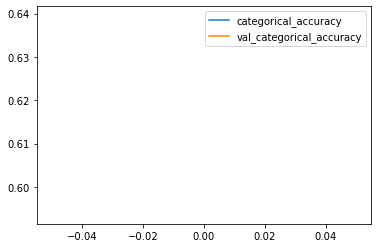

In [40]:
plot.plot(history.history['categorical_accuracy'])
plot.plot(history.history['val_categorical_accuracy'])
plot.legend(['categorical_accuracy','val_categorical_accuracy'])

In [41]:
pred = model.predict_generator(test_generator,verbose = 1)

C:\Users\RAJKUMAR\AppData\Local\Temp/ipykernel_11460/263742769.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_generator,verbose = 1)


208/208 [==============================] - 835s 4s/step


In [42]:
pred.shape

(6636, 3)

In [43]:
fn = test_generator.filenames

In [44]:
fn

['test\\10.jpg',
 'test\\1000.jpg',
 'test\\10002.jpg',
 'test\\10003.jpg',
 'test\\10005.jpg',
 'test\\10006.jpg',
 'test\\1001.jpg',
 'test\\10010.jpg',
 'test\\10012.jpg',
 'test\\10014.jpg',
 'test\\10020.jpg',
 'test\\10022.jpg',
 'test\\10024.jpg',
 'test\\10029.jpg',
 'test\\10032.jpg',
 'test\\10033.jpg',
 'test\\10037.jpg',
 'test\\10039.jpg',
 'test\\10042.jpg',
 'test\\10044.jpg',
 'test\\10049.jpg',
 'test\\10052.jpg',
 'test\\10054.jpg',
 'test\\10060.jpg',
 'test\\10064.jpg',
 'test\\10066.jpg',
 'test\\10072.jpg',
 'test\\10074.jpg',
 'test\\10075.jpg',
 'test\\10077.jpg',
 'test\\10083.jpg',
 'test\\10089.jpg',
 'test\\10090.jpg',
 'test\\10094.jpg',
 'test\\10102.jpg',
 'test\\10106.jpg',
 'test\\1011.jpg',
 'test\\10113.jpg',
 'test\\10114.jpg',
 'test\\10115.jpg',
 'test\\10121.jpg',
 'test\\10124.jpg',
 'test\\10128.jpg',
 'test\\10129.jpg',
 'test\\10136.jpg',
 'test\\10138.jpg',
 'test\\10142.jpg',
 'test\\10144.jpg',
 'test\\10148.jpg',
 'test\\10151.jpg',
 'test

In [45]:
rep1 = [s.replace('test\\','') for s in fn]

In [46]:
rep1

['10.jpg',
 '1000.jpg',
 '10002.jpg',
 '10003.jpg',
 '10005.jpg',
 '10006.jpg',
 '1001.jpg',
 '10010.jpg',
 '10012.jpg',
 '10014.jpg',
 '10020.jpg',
 '10022.jpg',
 '10024.jpg',
 '10029.jpg',
 '10032.jpg',
 '10033.jpg',
 '10037.jpg',
 '10039.jpg',
 '10042.jpg',
 '10044.jpg',
 '10049.jpg',
 '10052.jpg',
 '10054.jpg',
 '10060.jpg',
 '10064.jpg',
 '10066.jpg',
 '10072.jpg',
 '10074.jpg',
 '10075.jpg',
 '10077.jpg',
 '10083.jpg',
 '10089.jpg',
 '10090.jpg',
 '10094.jpg',
 '10102.jpg',
 '10106.jpg',
 '1011.jpg',
 '10113.jpg',
 '10114.jpg',
 '10115.jpg',
 '10121.jpg',
 '10124.jpg',
 '10128.jpg',
 '10129.jpg',
 '10136.jpg',
 '10138.jpg',
 '10142.jpg',
 '10144.jpg',
 '10148.jpg',
 '10151.jpg',
 '10154.jpg',
 '10155.jpg',
 '10158.jpg',
 '10162.jpg',
 '10163.jpg',
 '10170.jpg',
 '10180.jpg',
 '10186.jpg',
 '1019.jpg',
 '10194.jpg',
 '10208.jpg',
 '10218.jpg',
 '10223.jpg',
 '10227.jpg',
 '10228.jpg',
 '1023.jpg',
 '10230.jpg',
 '10233.jpg',
 '10234.jpg',
 '10238.jpg',
 '1024.jpg',
 '10241.jpg',
 

In [47]:
np.array(rep1)

array(['10.jpg', '1000.jpg', '10002.jpg', ..., '9993.jpg', '9995.jpg',
       '9996.jpg'], dtype='<U9')

In [48]:
mapping = train_generator.class_indices

In [49]:
mapping

{'MIDDLE': 0, 'OLD': 1, 'YOUNG': 2}

In [50]:
label_dict = {}
label_dict[0] = 'MIDDLE'
label_dict[1] = 'OLD'
label_dict[2] = 'YOUNG'

In [51]:
pred

array([[0.71369123, 0.12548654, 0.1608223 ],
       [0.61441505, 0.23715347, 0.14843151],
       [0.872416  , 0.01835466, 0.10922936],
       ...,
       [0.9659709 , 0.00458345, 0.0294457 ],
       [0.8274217 , 0.10934984, 0.06322842],
       [0.29195115, 0.00630378, 0.70174503]], dtype=float32)

In [52]:
pred[:,1]

array([0.12548654, 0.23715347, 0.01835466, ..., 0.00458345, 0.10934984,
       0.00630378], dtype=float32)

In [53]:
np.max(pred)

0.9964059

In [54]:
predict = np.argmax(pred, axis = 1) 

In [55]:
predict

array([0, 0, 0, ..., 0, 0, 2], dtype=int64)

In [56]:
pred_label =np.array([label_dict[i] for i in predict])

In [57]:
pred_label 

array(['MIDDLE', 'MIDDLE', 'MIDDLE', ..., 'MIDDLE', 'MIDDLE', 'YOUNG'],
      dtype='<U6')

In [58]:
output = pd.DataFrame()
output['Class'] = pred_label
output['ID'] = np.array(rep1)

In [59]:
output.to_csv("age-finder_res.csv",header=True,index=False)